In [3]:
import numpy as np
import scipy
import scipy.optimize
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.colors as mcolors
from mpl_toolkits import mplot3d
import glob
import time
import pandas as pd
from PIL import Image
from scipy.stats import gaussian_kde
import seaborn as sns

plt.rcParams["figure.figsize"] = (3,3)

print (time.ctime())

Mon Jul 13 09:39:53 2020


In [15]:
x1=83.63314485147552 ; y1=103.56078337204558
x2=89.87622732198322 ; y2=103.59569113653744
x3=95.67979844778523 ; y3=103.57261818625021
x4=101.35139921500111 ; y4=103.64573287525187
x5=107.12725046191181 ; y5=103.55650885357784
x6=113.06158595298297 ; y6=103.53295845237241
x7=119.312467897662 ; y7=103.54974987388628
x8=126.70364773168521 ; y8=103.39793985834332

old_data_table = pd.read_csv('Trigger Data Pandas')
ion_motion_data = pd.read_csv('8 Ion Motion Data')


In [16]:
Ion_1 = (
        old_data_table
        .query("`cluster size` > 3")
        .query(f"((xc-{x1})**2 + (yc-{y1})**2)**(1/2) <= 2")
        .query(f"1.53e11 < time < 1.9e11 or 1.98e11 < time < 2.025e11 or 2.07e11 < time < 2.4e11")
        .reset_index(drop=True)
)

Ion_2 = (
        old_data_table
        .query("`cluster size` > 3")
        .query(f"((xc-{x2})**2 + (yc-{y2})**2)**(1/2) <= 2")
        .query(f"0 < time < .29e11 or .37e11 < time< .41e11 or 1.53e11 < time < 1.7e11 or 1.92e11< time < 2.5e11 or 2.7e11 < time < 2.86e11")
        .reset_index(drop=True)
)

Ion_3 = (
        old_data_table
        .query("`cluster size` > 3")
        .query(f"((xc-{x3})**2 + (yc-{y3})**2)**(1/2) <= 2")
        .query(f"0 < time < 1.53e11")
        .reset_index(drop=True)
)

Ion_4 = (
        old_data_table
        .query("`cluster size` > 3")
        .query(f"((xc-{x4})**2 + (yc-{y4})**2)**(1/2) <= 2")
        .query(f"1.53e11 < time < 2.4e11")
        .reset_index(drop=True)
)

Ion_5 = (
        old_data_table
        .query("`cluster size` > 3")
        .query(f"((xc-{x5})**2 + (yc-{y5})**2)**(1/2) <= 2")
        .query(f"1.53e11 < time < 2.18e11 or 2.7e11 < time < 3e11")
        .reset_index(drop=True)
)

Ion_6 = (
        old_data_table
        .query("`cluster size` > 3")
        .query(f"((xc-{x6})**2 + (yc-{y6})**2)**(1/2) <= 2")
        .query(f"time < 1.53e11 or 2.16e11 < time < 2.52e11")
        .reset_index(drop=True)
)

Ion_7 = (
        old_data_table
        .query("`cluster size` > 3")
        .query(f"((xc-{x7})**2 + (yc-{y7})**2)**(1/2) <= 2")
        .query(f" time < .41e11 or .53e11 < time < 1.53e11 or 2.39e11 < time < 2.52e11 or 2.69e11 < time < 2.82e11")
        .reset_index(drop=True)
)

Ion_8 = (
        old_data_table
        .query("`cluster size` > 3")
        .query(f"((xc-{x8})**2 + (yc-{y8})**2)**(1/2) <= 2")
        .query(f".41e11 < time < 1.53e11 or 2.69e11 < time")
        .reset_index(drop=True)
)



In [17]:
data_table = Ion_1
data_table = data_table.append(Ion_2)
data_table = data_table.append(Ion_3)
data_table = data_table.append(Ion_4)
data_table = data_table.append(Ion_5)
data_table = data_table.append(Ion_6)
data_table = data_table.append(Ion_7)
data_table = data_table.append(Ion_8)
data_table

Unnamed: 0            tt    y    x          time  center flux  \
0         1427019  1.534737e+11  103   85  1.534737e+11         3375   
1         1428549  1.536368e+11  104   82  1.536368e+11         2325   
2         1429438  1.537349e+11  102   84  1.537349e+11         4775   
3         1431592  1.539738e+11  101   84  1.539738e+11         3050   
4         1434113  1.542548e+11  102   83  1.542549e+11         2075   
...           ...           ...  ...  ...           ...          ...   
16939     2571161  3.036933e+11  102  126  3.036933e+11         1750   
16940     2571174  3.036952e+11  102  125  3.036952e+11         2175   
16941     2571210  3.037000e+11  103  125  3.037000e+11         1775   
16942     2571316  3.037125e+11  104  126  3.037125e+11         2300   
16943     2571345  3.037165e+11  104  126  3.037165e+11         2450   

       cluster flux          tof  cluster size          yc          xc  tot-i  \
0              9275  3230.468750             8  103.063342   85.553908    135   
1              5900  6542.712402             7  104.872881   82.398305     93   
2             13625  3432.293701            11  102.622936   84.843119    191   
3              6775  6177.087402             6  101.747232   84.278598    122   
4              4275  7504.687500             6  102.195906   83.400585     83   
...             ...          ...           ...         ...         ...    ...   
16939          5000  6993.750000             6  102.060000  126.140000     70   
16940          5850  3398.699951             6  102.927350  125.260684     87   
16941          4050  5782.293701             6  103.746914  125.191358     71   
16942          6500  5035.937500             6  104.823077  126.138462     92   
16943          5475  3729.949951             6  104.111872  126.440639     98   

           tfold  
0      27.875447  
1      52.736079  
2      10.541530  
3      15.849381  
4      28.496271  
...          ...  
16939  10.666224  
16940  31.737497  
16941   4.583699  
16942  25.283536  
16943  34.249195  

[170406 rows x 13 columns]

In [18]:
def Gaussian(x, xm, sigma, A, c):
    return np.absolute(A)*np.exp(-np.power((x-xm)/sigma,2)/2) + c

Tmin = 0.006129999999657798  Tmax =  54.787660343749764 length =  54.781530343750106
0
10
20


/home/maverickmillican/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


30
40
50
60
70
80
90


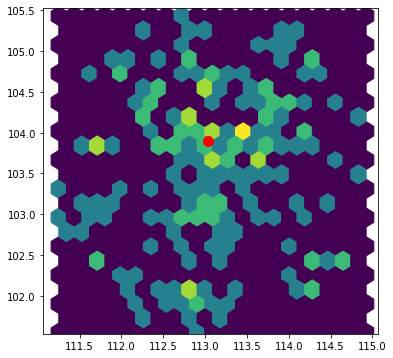

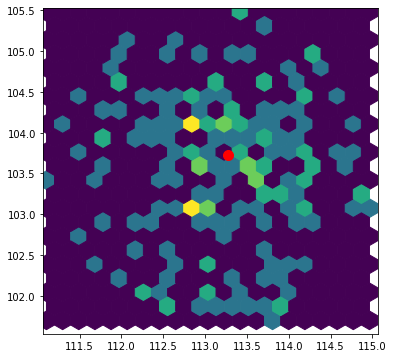

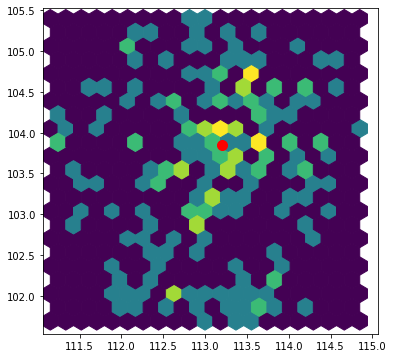

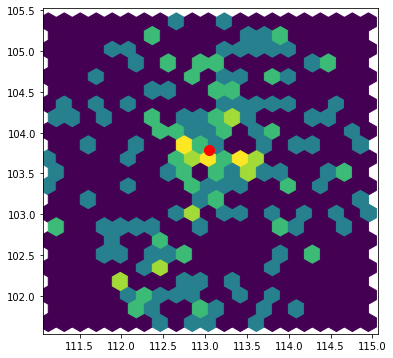

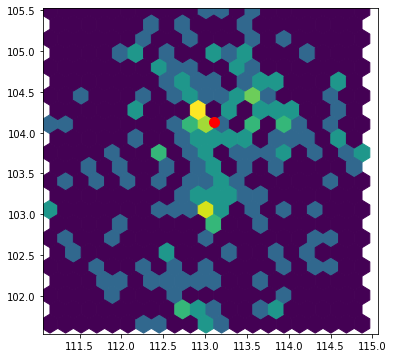

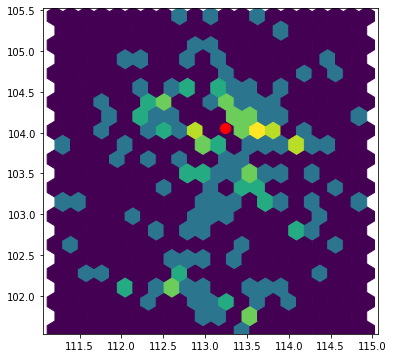

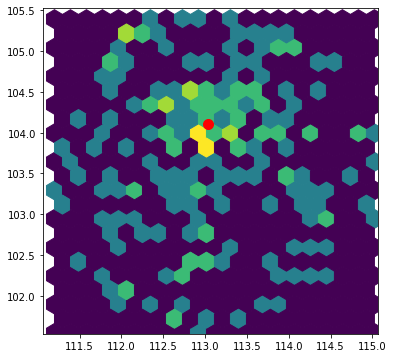

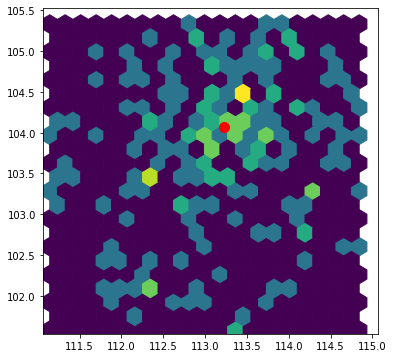

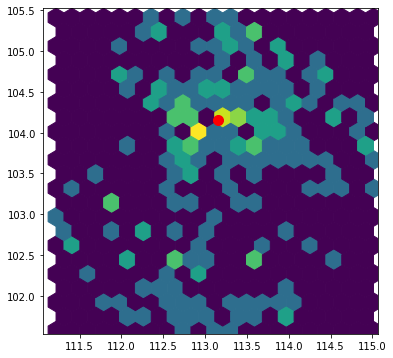

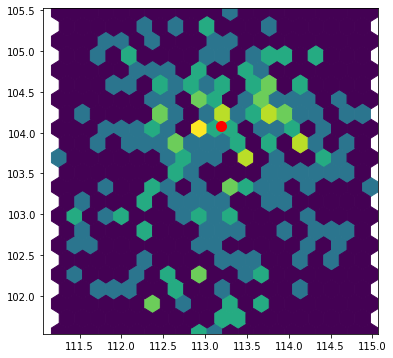

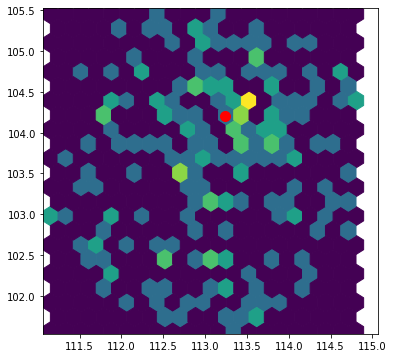

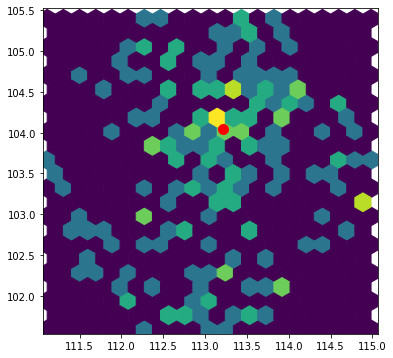

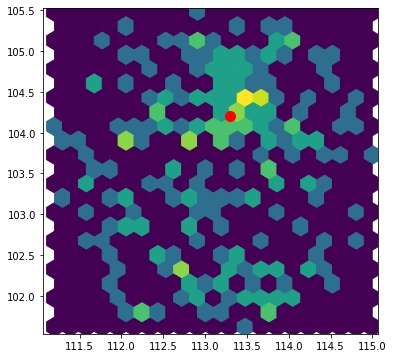

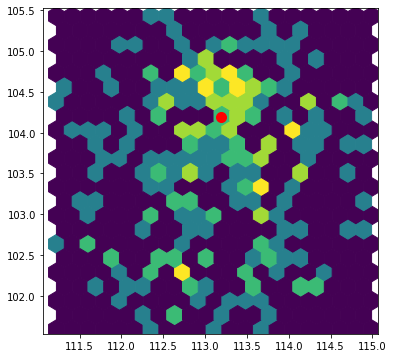

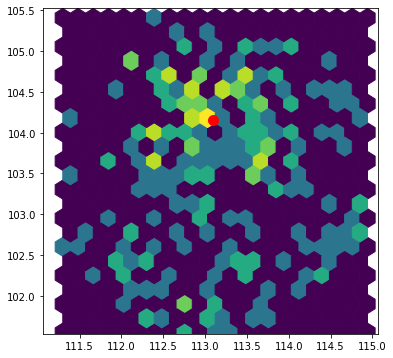

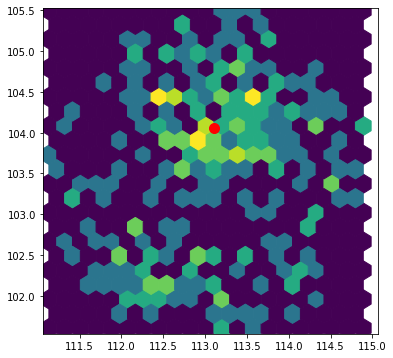

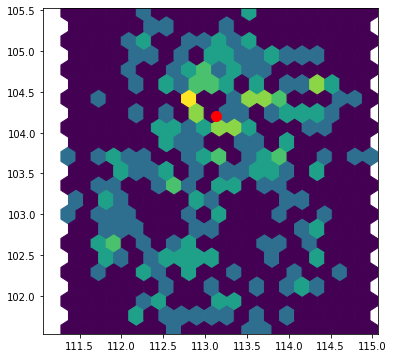

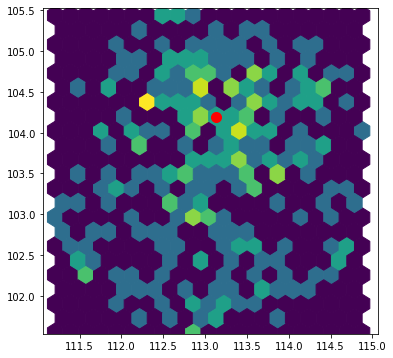

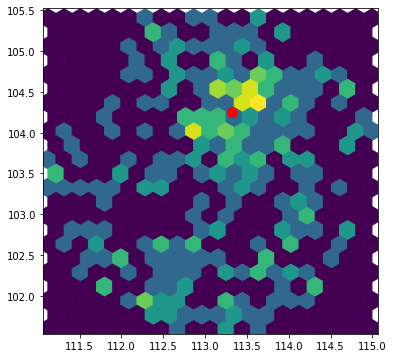

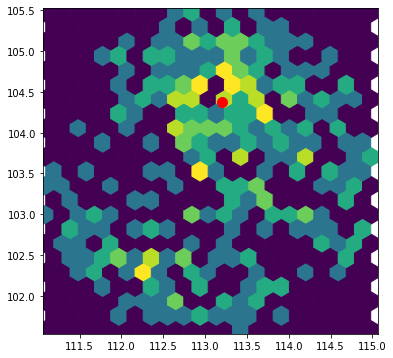

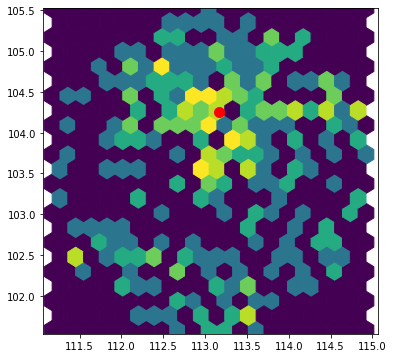

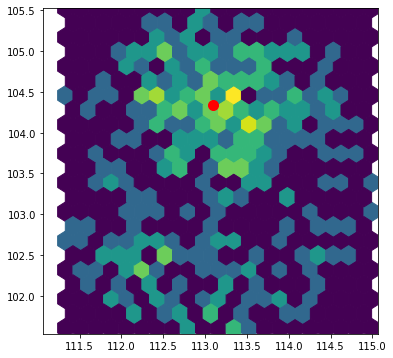

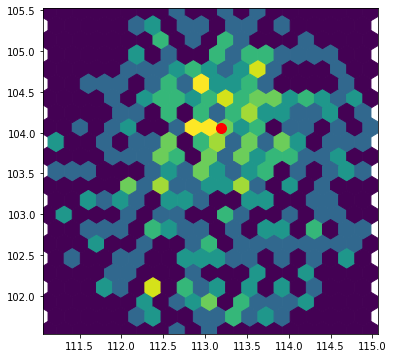

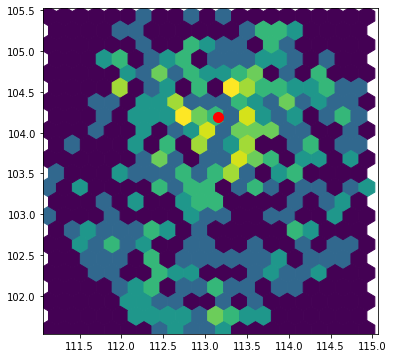

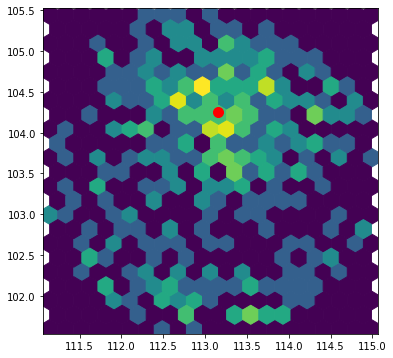

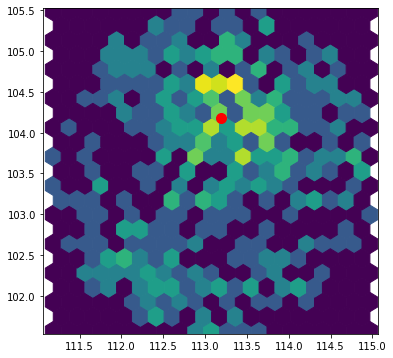

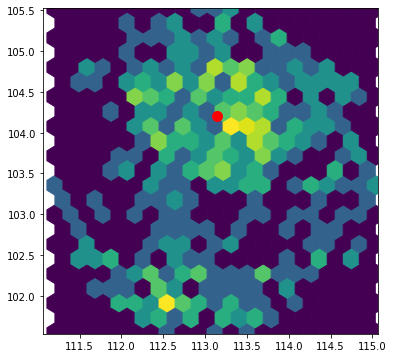

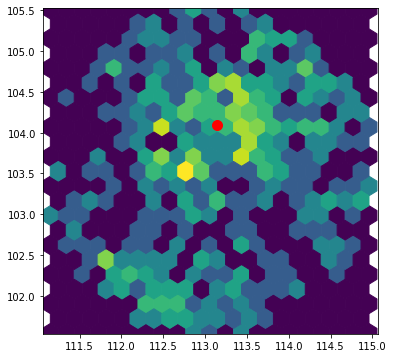

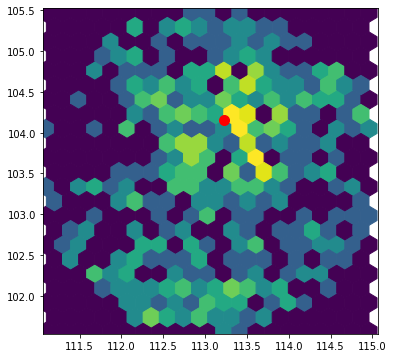

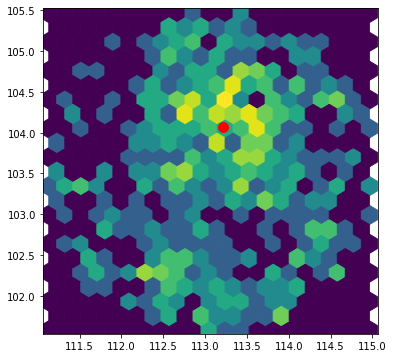

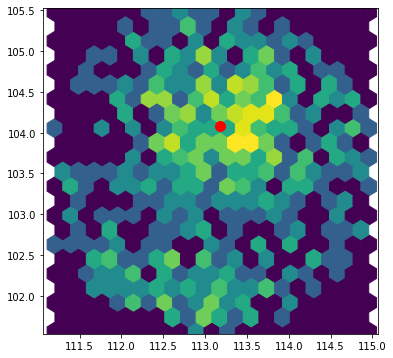

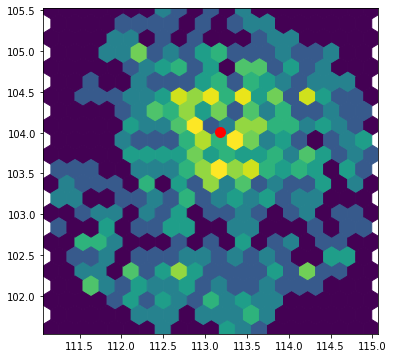

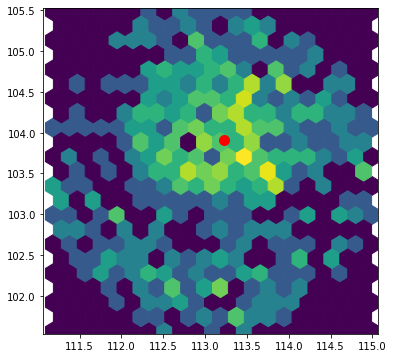

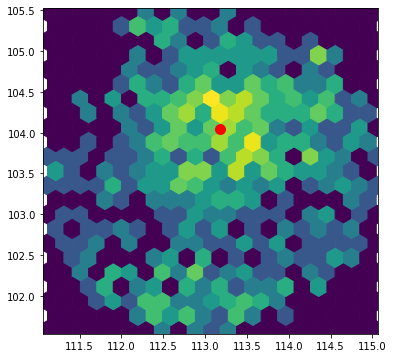

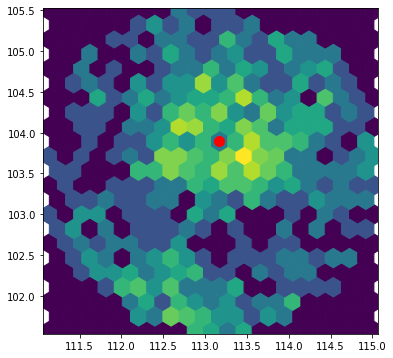

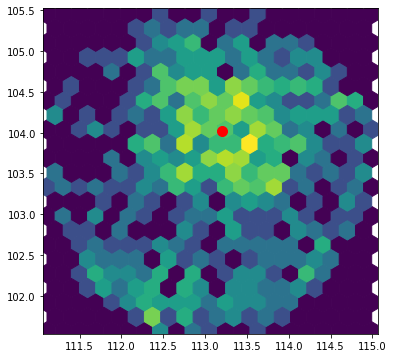

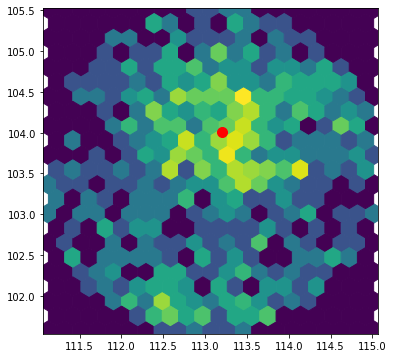

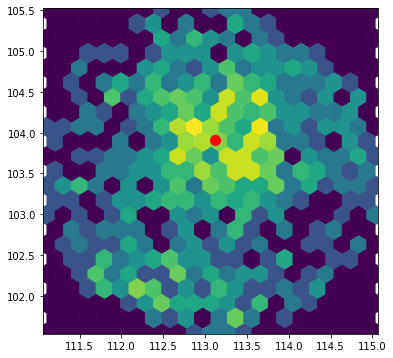

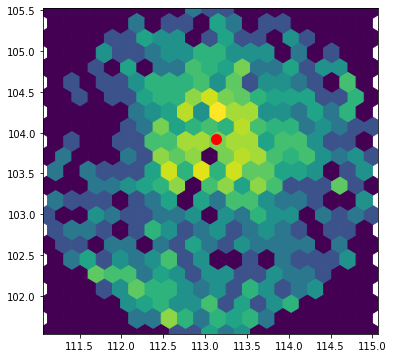

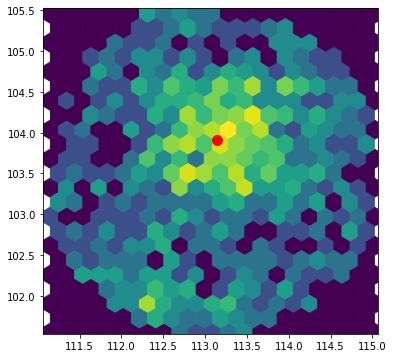

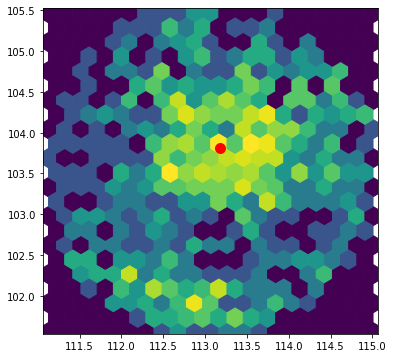

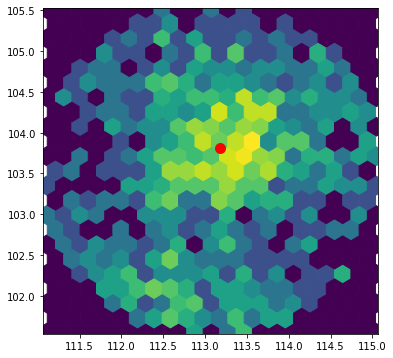

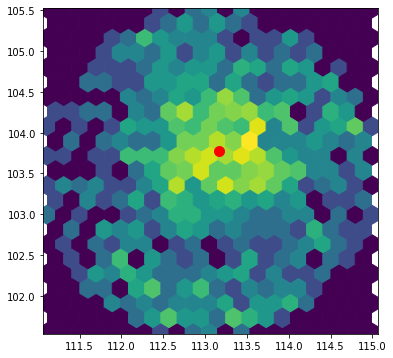

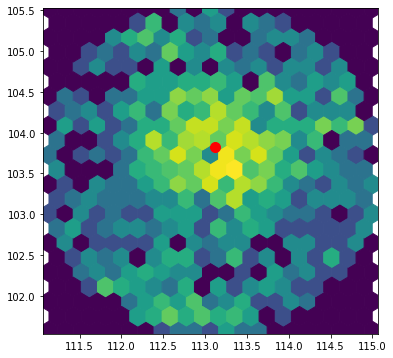

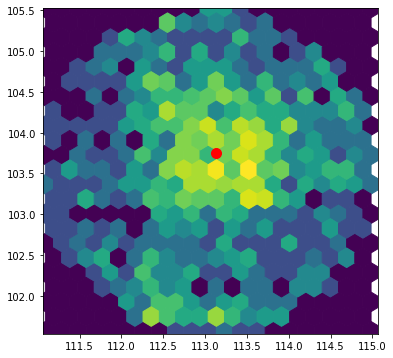

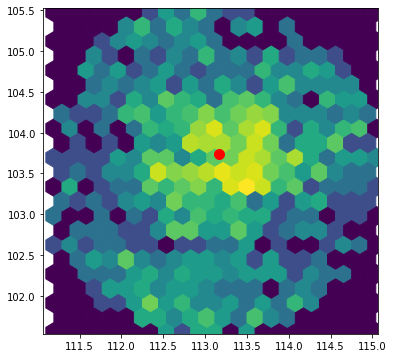

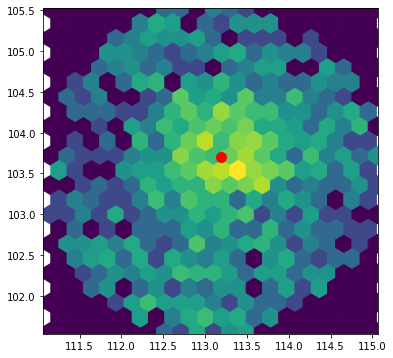

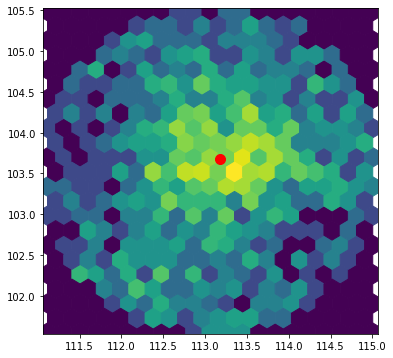

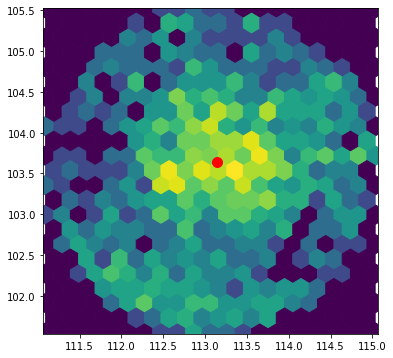

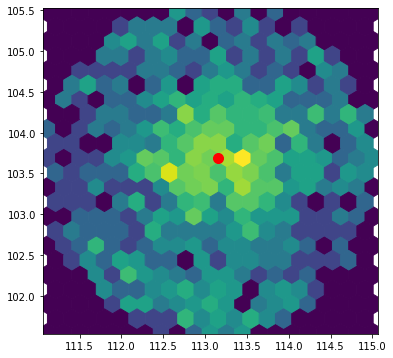

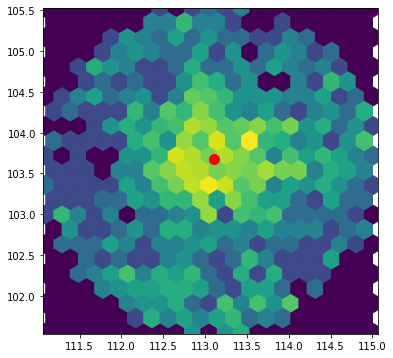

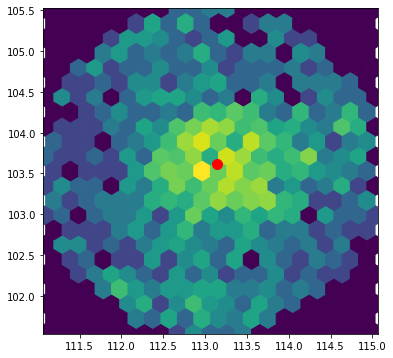

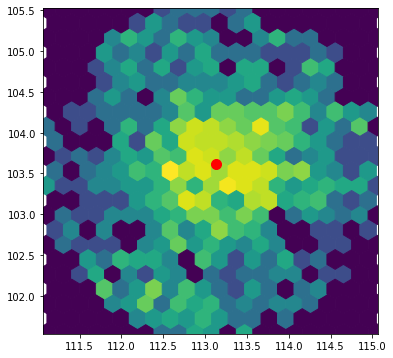

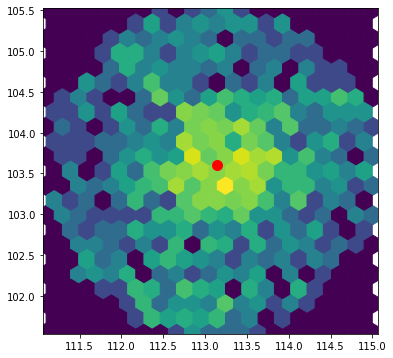

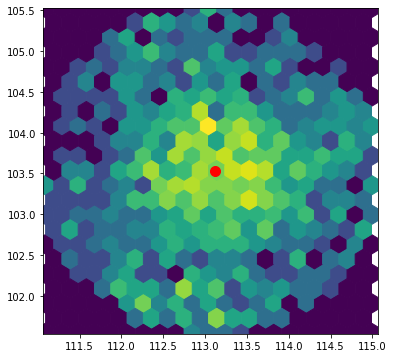

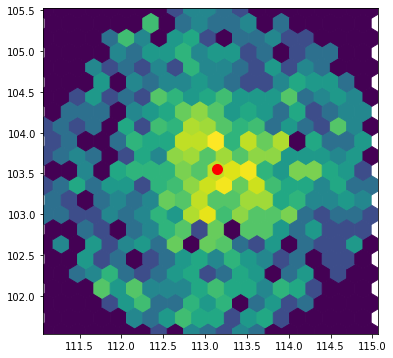

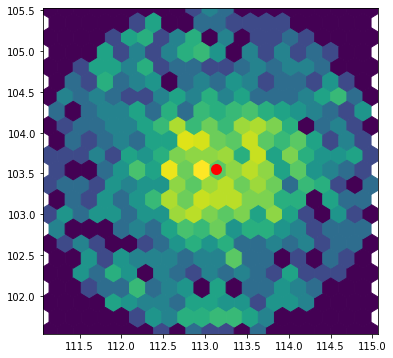

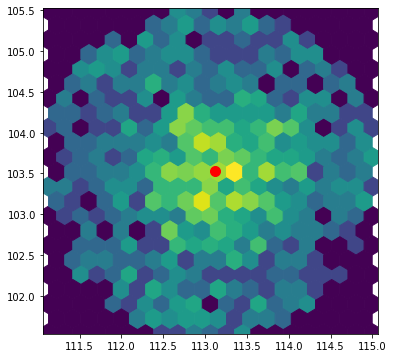

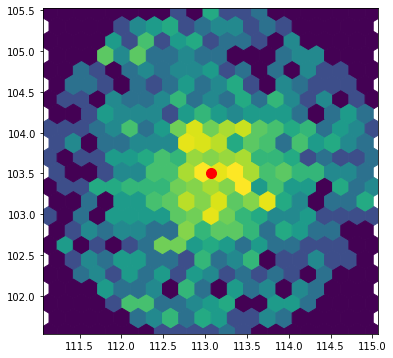

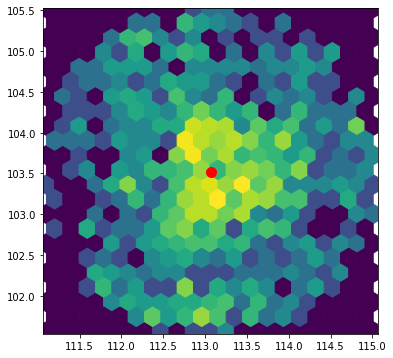

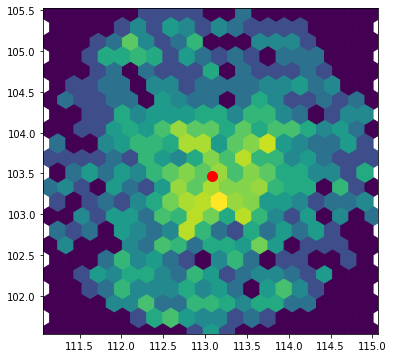

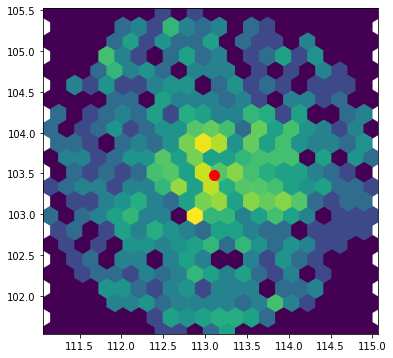

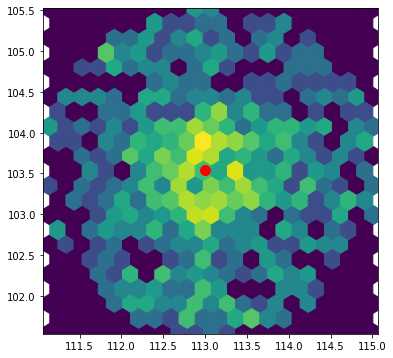

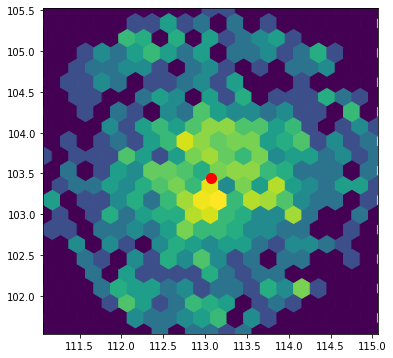

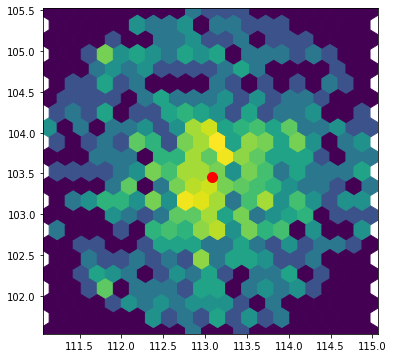

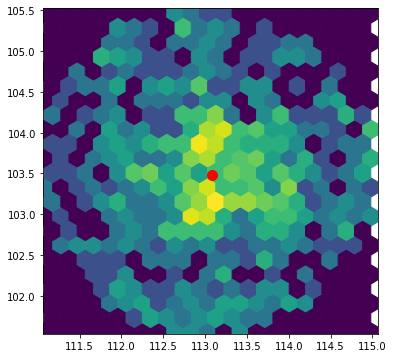

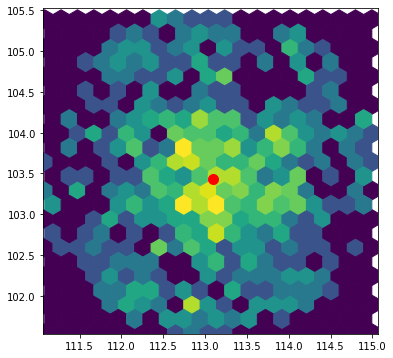

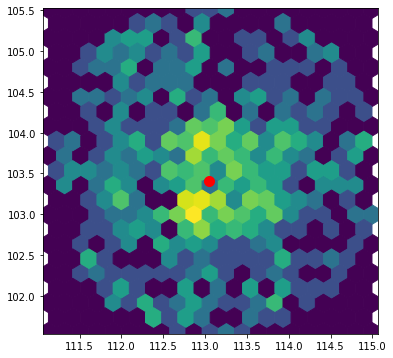

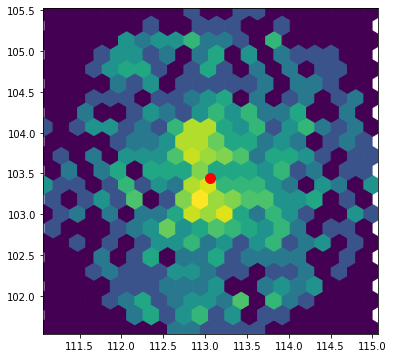

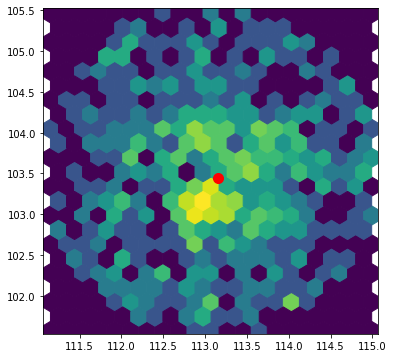

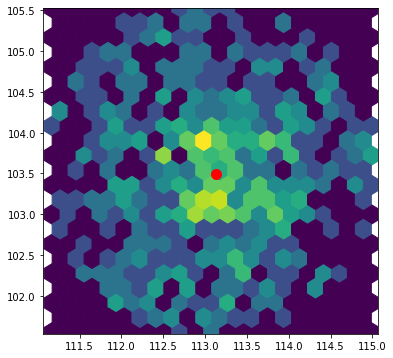

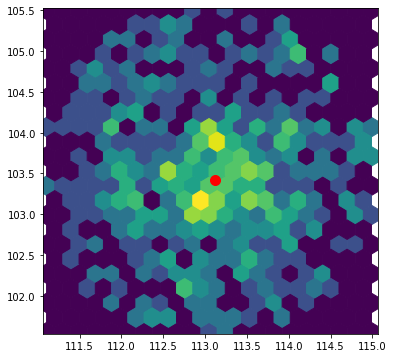

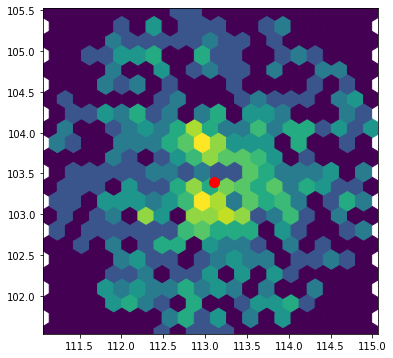

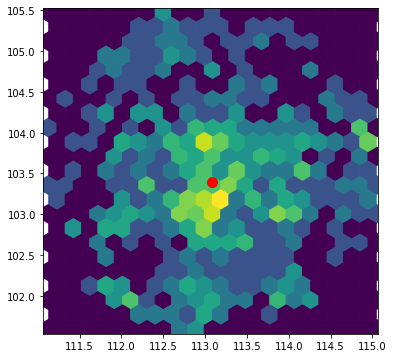

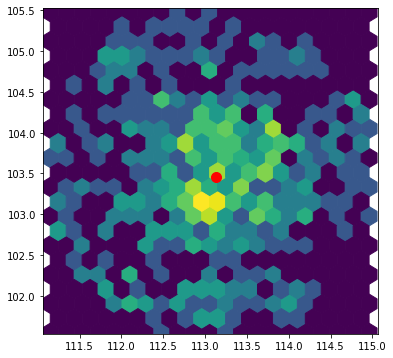

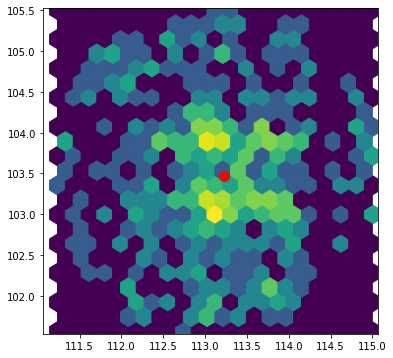

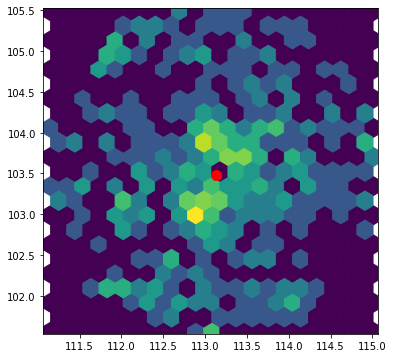

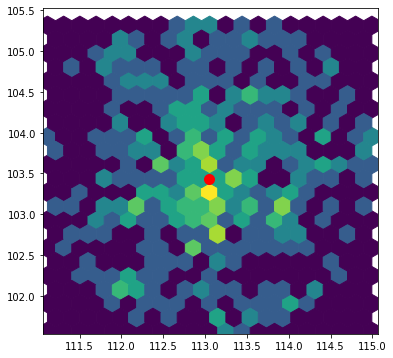

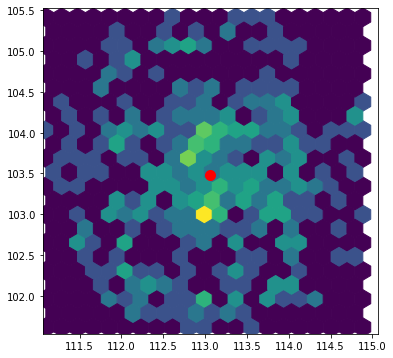

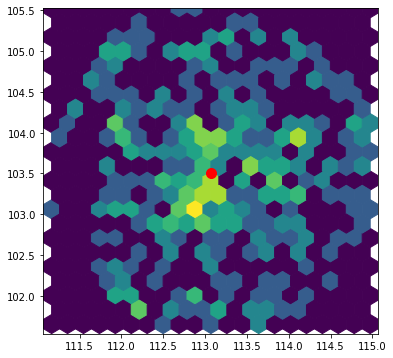

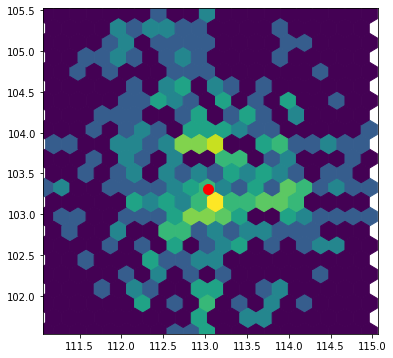

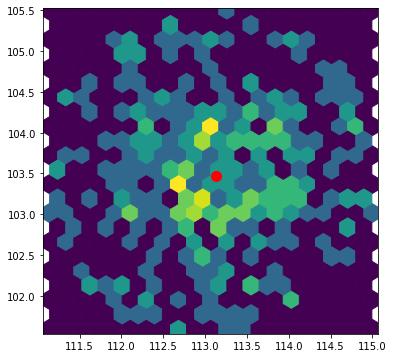

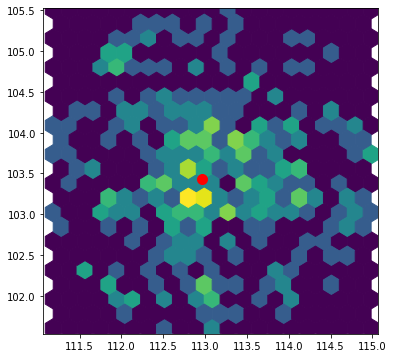

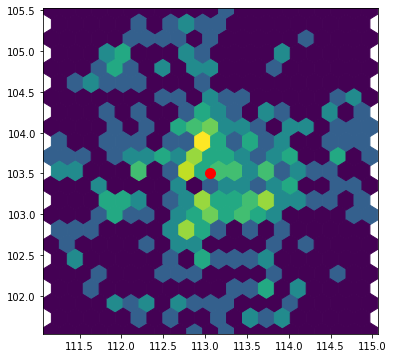

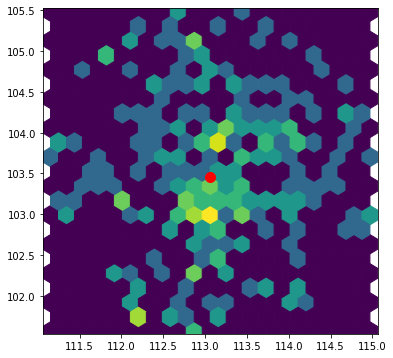

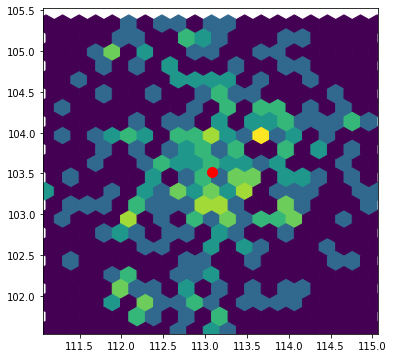

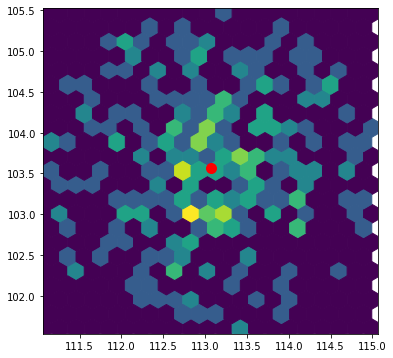

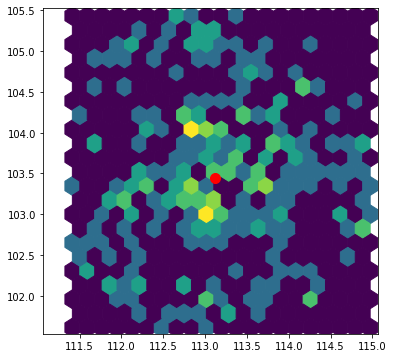

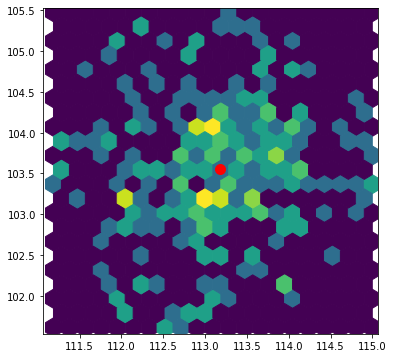

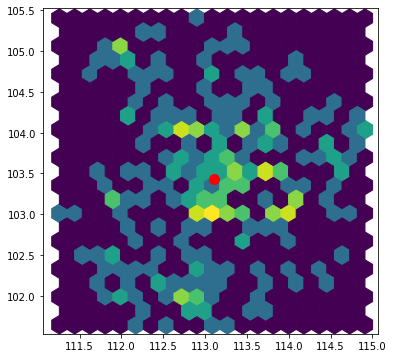

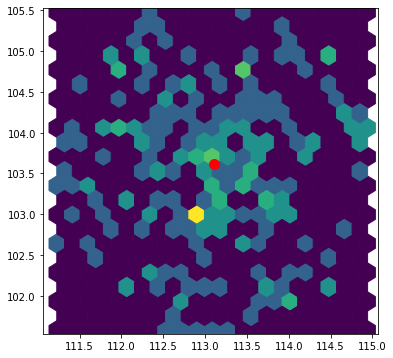

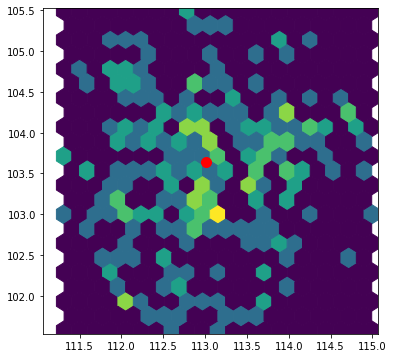

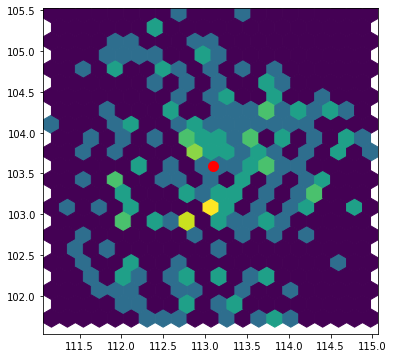

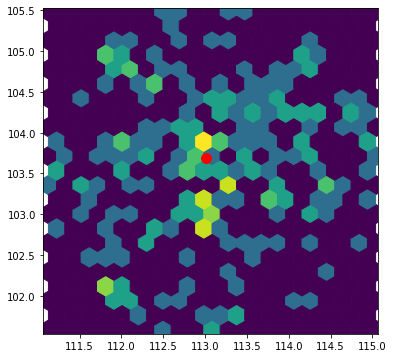

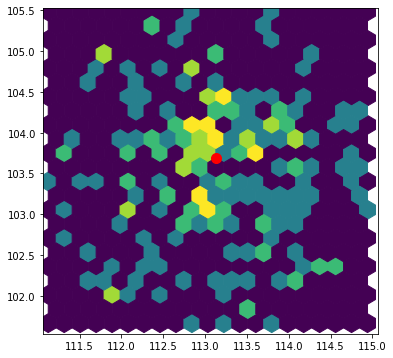

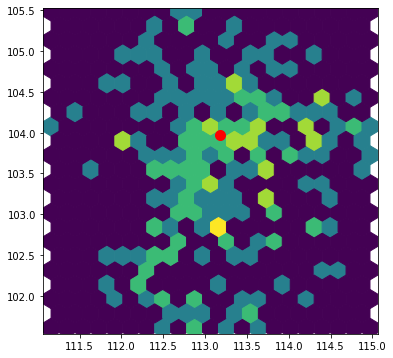

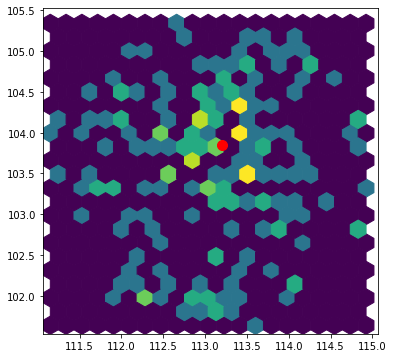

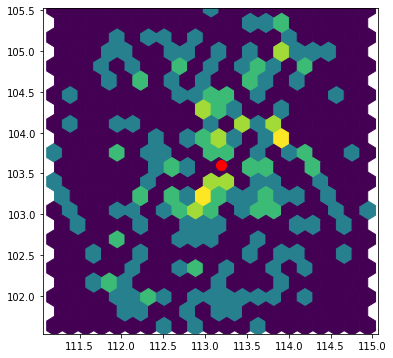

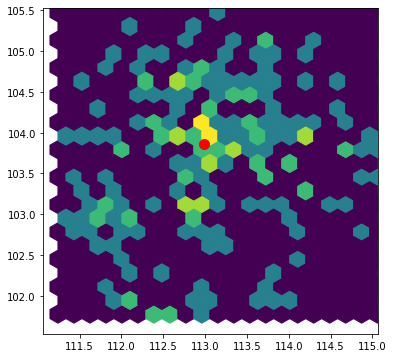

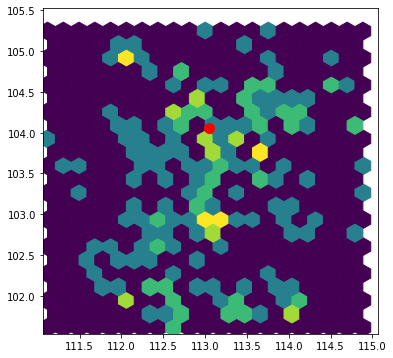

In [8]:
pbins = 8
tbins = 100      
n=0
used_data = Ion_6#.query(f"1.54e11 < time < 1.545e11")
t = used_data['tfold']
Tmin = t.min()
Tmax = t.max()
mean_x = x6; mean_y = y6+1
sigma_x = 1; sigma_y = 1
amp_x = 500; amp_y = 500
c_x = 0; c_y = 0
            
print ('Tmin =', Tmin, ' Tmax = ', Tmax, 'length = ', Tmax-Tmin)

Tbin = (Tmax - Tmin)/tbins
for i in range(0,tbins):
    if (i/10).is_integer() is True:
        print(i)
    start = Tmin + i*Tbin; stop = start + Tbin
    used = (Ion_6
             .query(f"{start}< tfold <{stop}"))
    
    xguess  = np.array([mean_x,sigma_x,amp_x,c_x])
    yguess  = np.array([mean_y,sigma_y,amp_y,c_y])
        
    hist_x, bins_x = np.histogram(used['xc'], 20, (x6-2,x6+2)) #, density=True),
    bin_centres_x = (bins_x[:-1] + bins_x[1:])/2
            
    hist_y, bins_y = np.histogram(used['yc'], 20, (y6-2,y6+2)) #, density=True) 
    bin_centres_y = (bins_y[:-1] + bins_y[1:])/2
                            
    popt_x, pcov_x = scipy.optimize.curve_fit(Gaussian, bin_centres_x, hist_x, p0=xguess, maxfev = 50000)
    hist_fit_x = Gaussian(bin_centres_x, *popt_x)
            
    popt_y, pcov_y = scipy.optimize.curve_fit(Gaussian, bin_centres_y, hist_y, p0=yguess, maxfev = 50000)
    hist_fit_y = Gaussian(bin_centres_y, *popt_y)
    mean_x = popt_x[0]; mean_y = popt_y[0]
    sigma_x = popt_x[1]; sigma_y = popt_y[1]
    amp_x = popt_x[2]; amp_y = popt_y[2]
    c_x = popt_x[3]; c_y = popt_y[3]
    
    
    fig, ax1 = plt.subplots(ncols=1, figsize=(6,6))
    ax1.hist2d(used['xc'], used['yc'], bins=20, range = [(x6-2,x6+2), (y6-2, y6+2)],  norm=mpl.colors.LogNorm())
    ax1.plot(mean_x, mean_y, 'ro', markersize=10)
    fig.savefig(f'All 8 Micromotion PNGs/{n}.png')
    n=n+1

    

In [9]:
images = [] 
n=0
for i in range(0,tbins):
    h = Image.open(f'All 8 Micromotion PNGs/{n}.png')
    images.append(h)
    n=n+1
    
images[0].save('All 8 Micromotion.gif',
               save_all=True,
               append_images=images[1:],
               duration=100,
               loop=0)

Tmin = 0.006129999999657798  Tmax =  54.787660343749764 length =  54.781530343750106
0
10
20


/home/maverickmillican/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


30
40
50
60
70
80
90


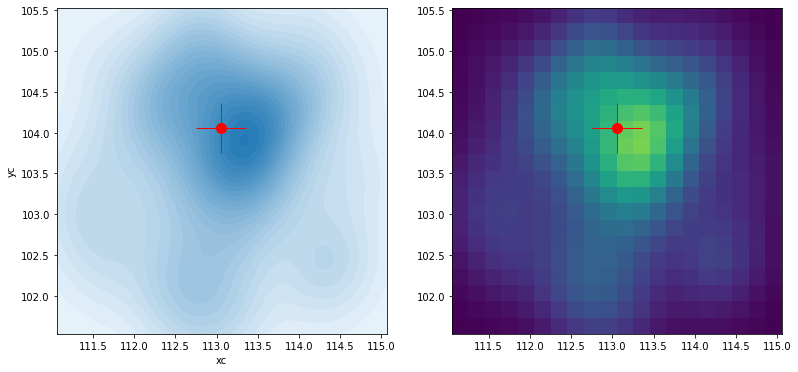

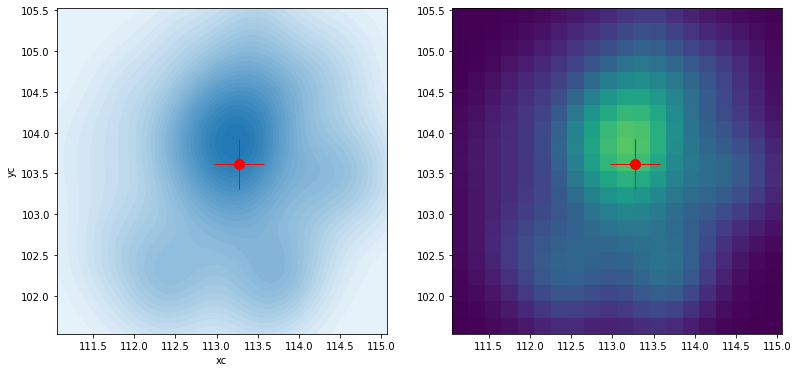

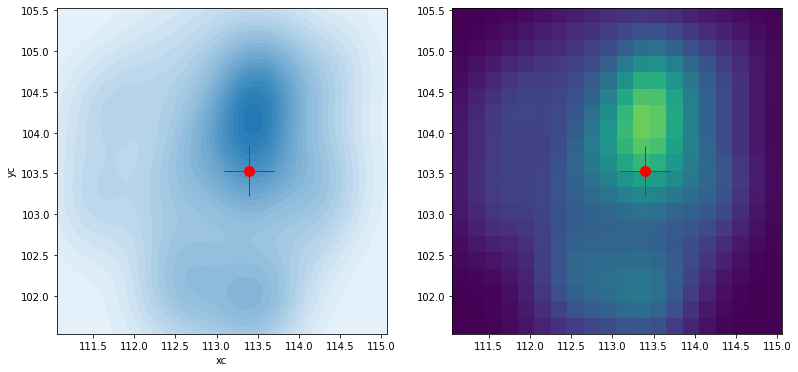

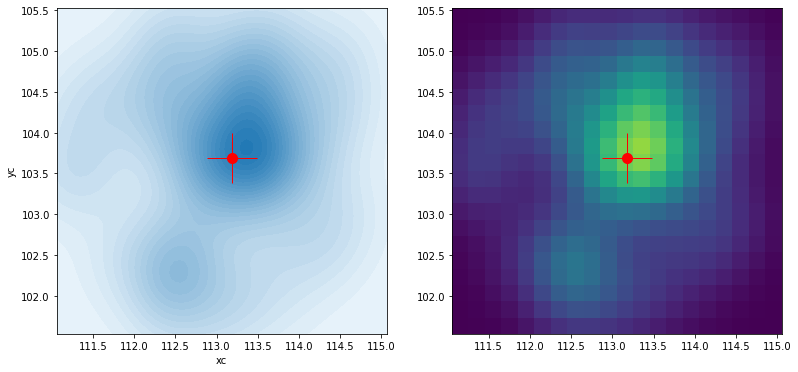

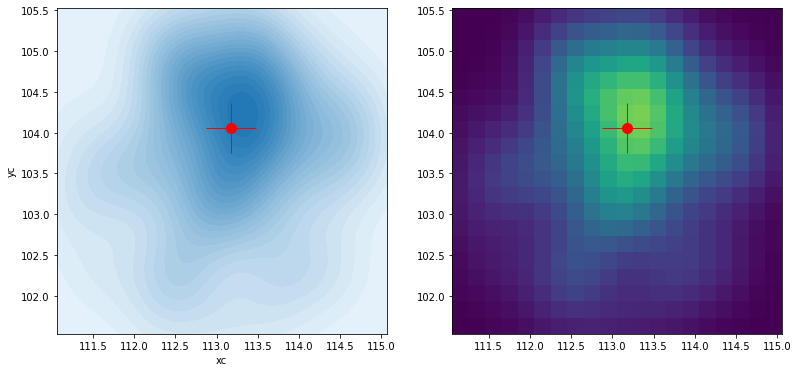

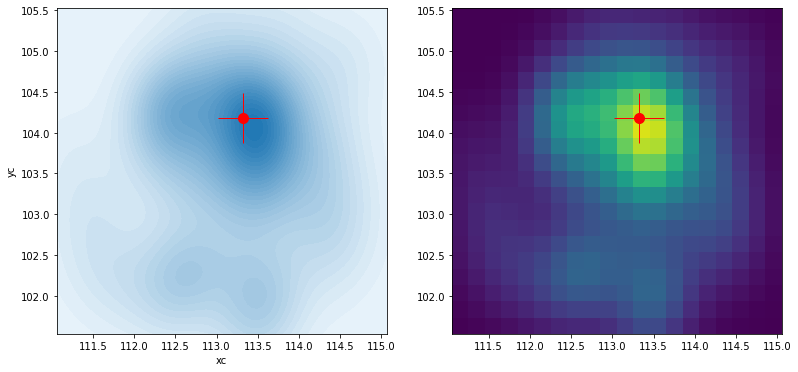

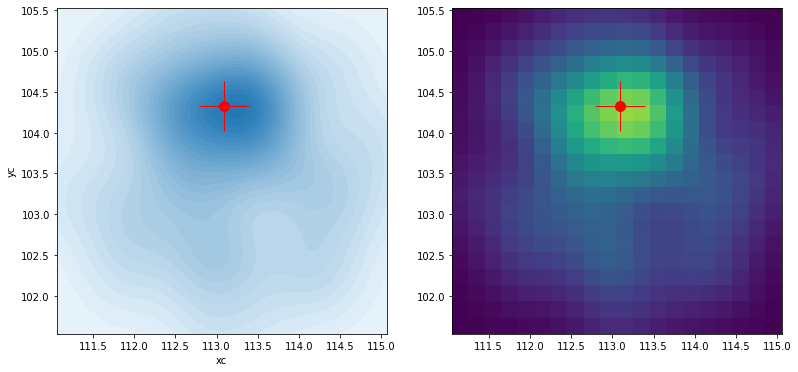

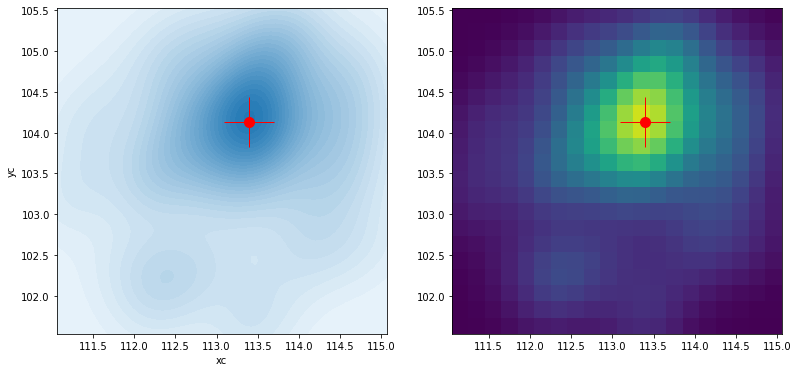

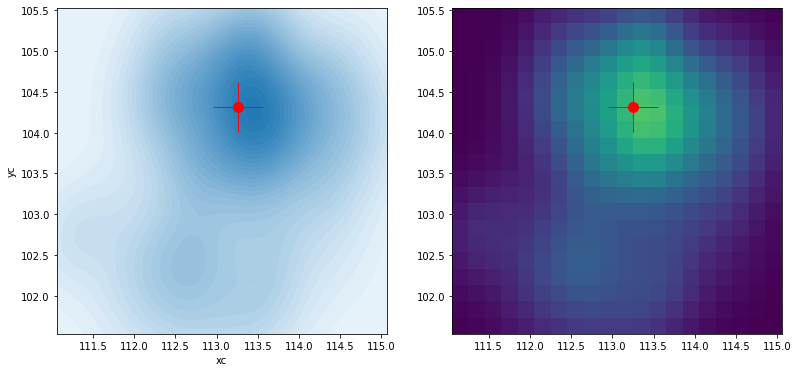

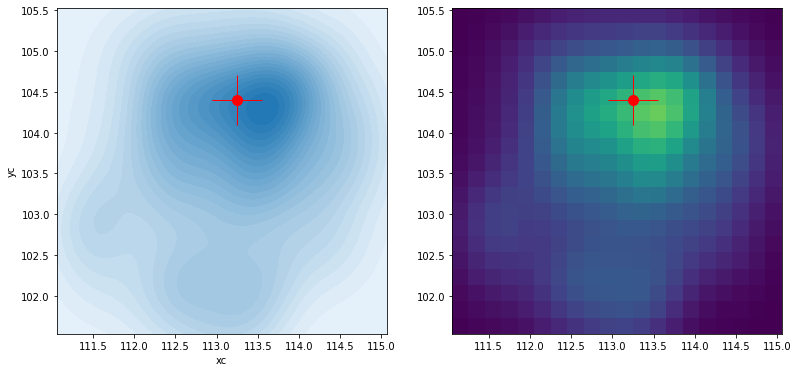

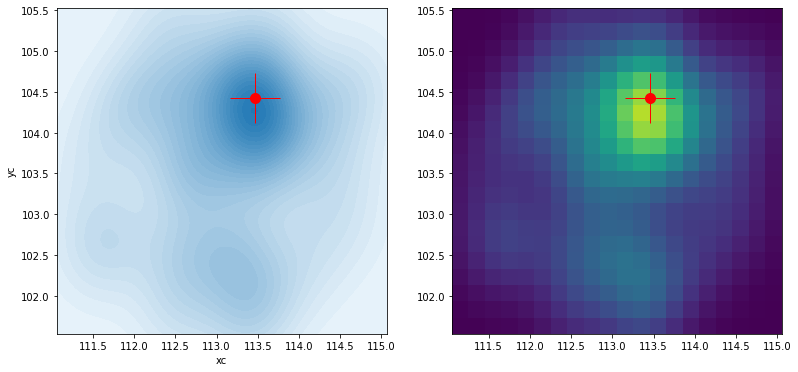

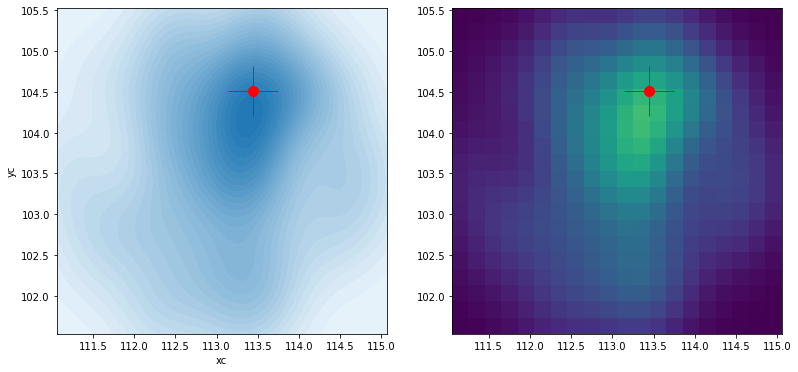

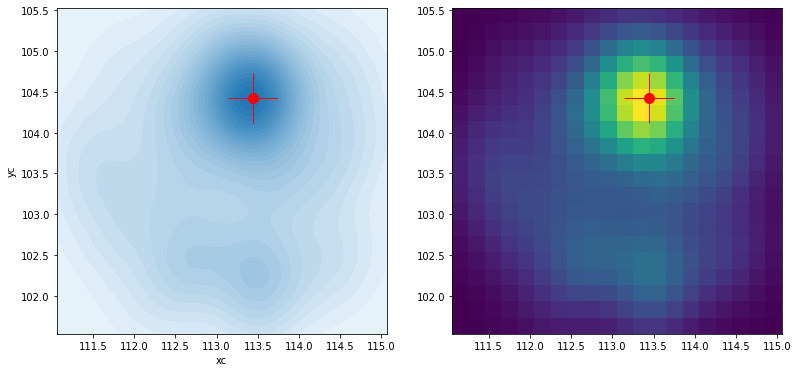

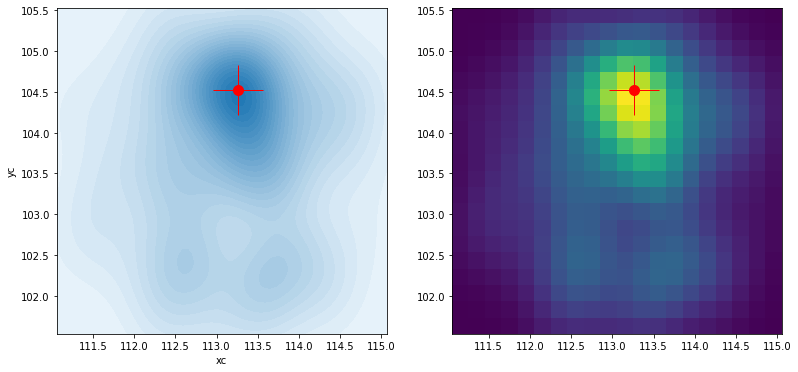

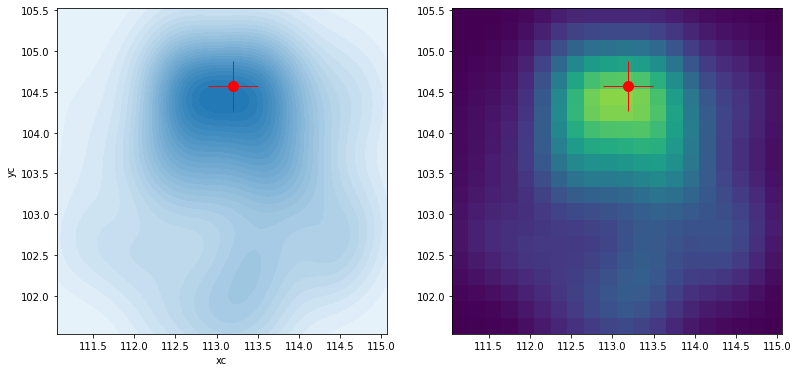

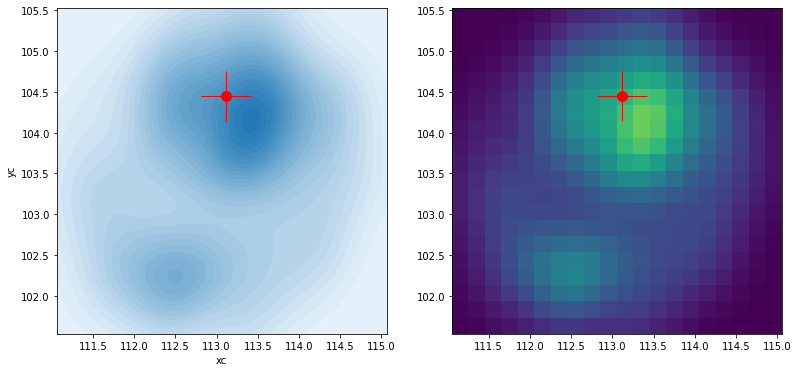

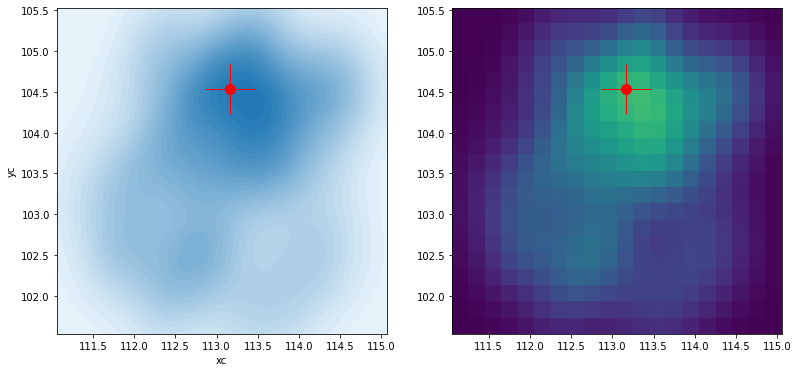

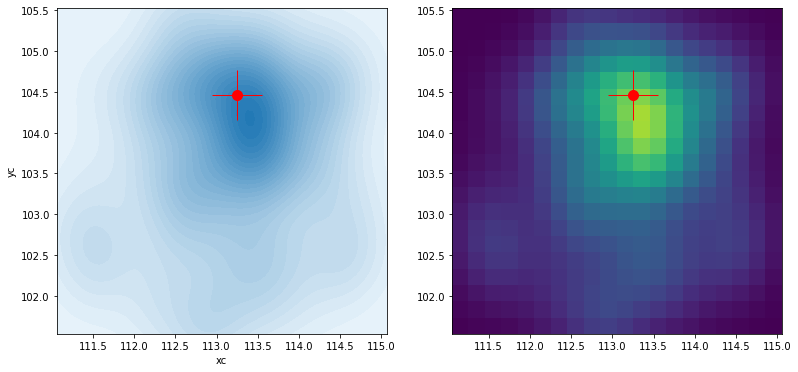

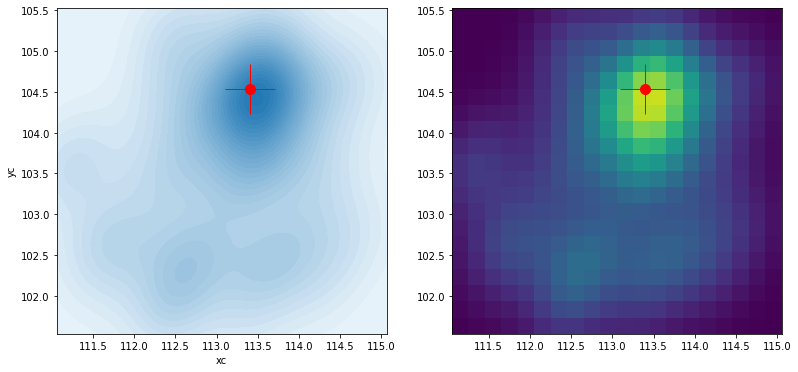

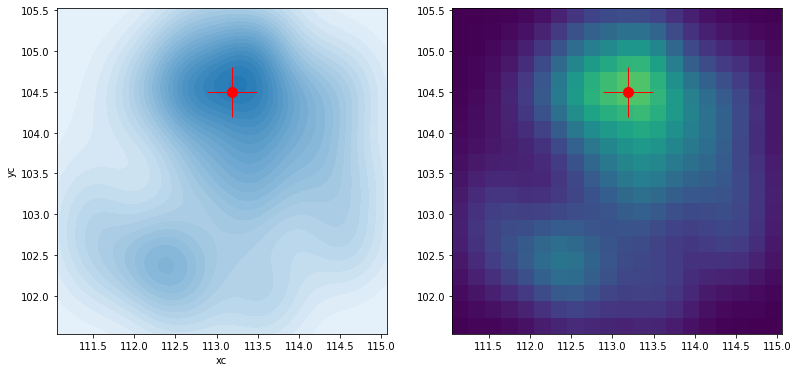

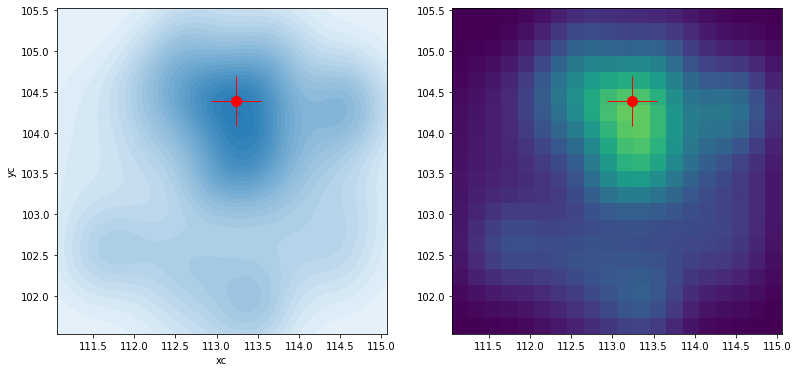

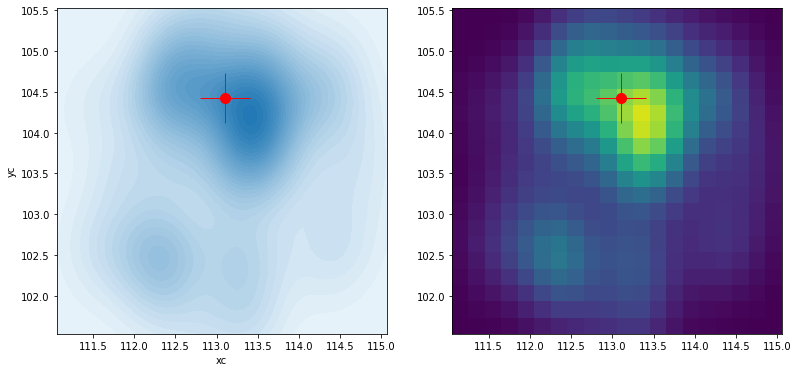

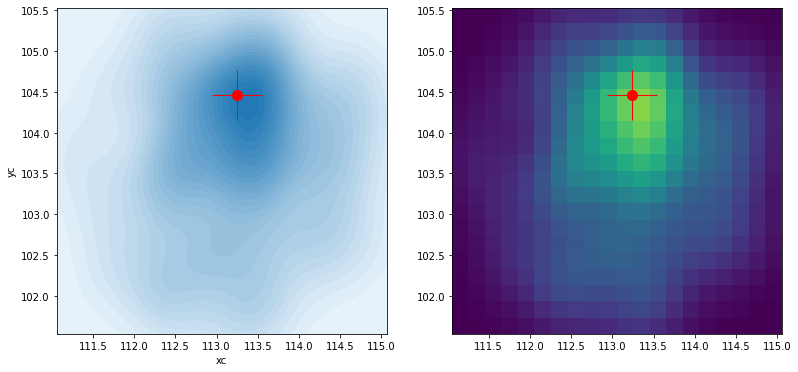

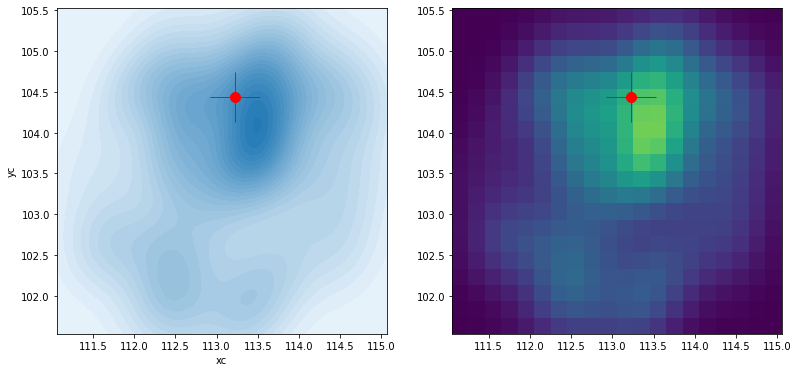

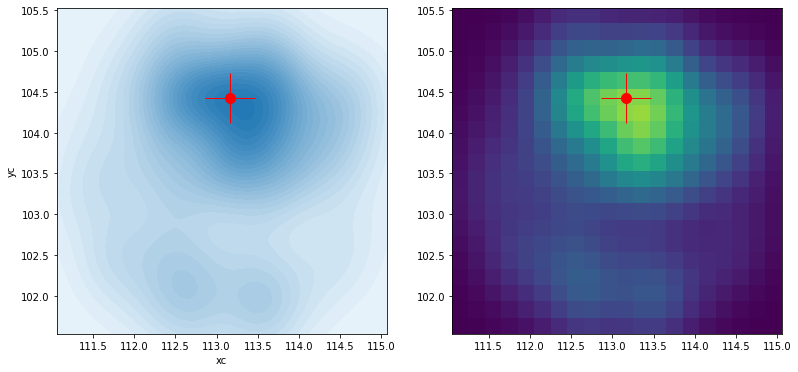

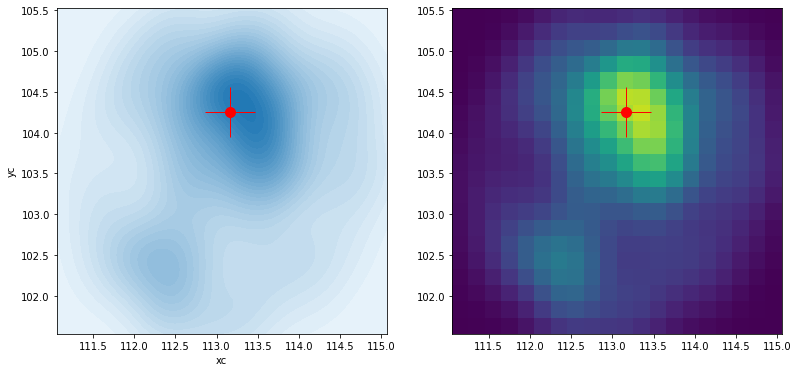

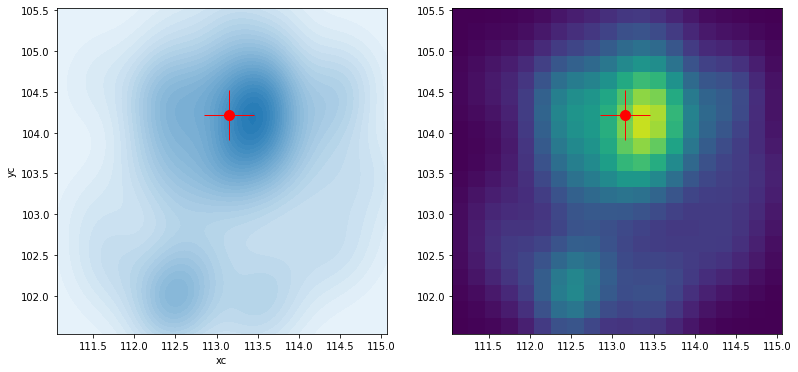

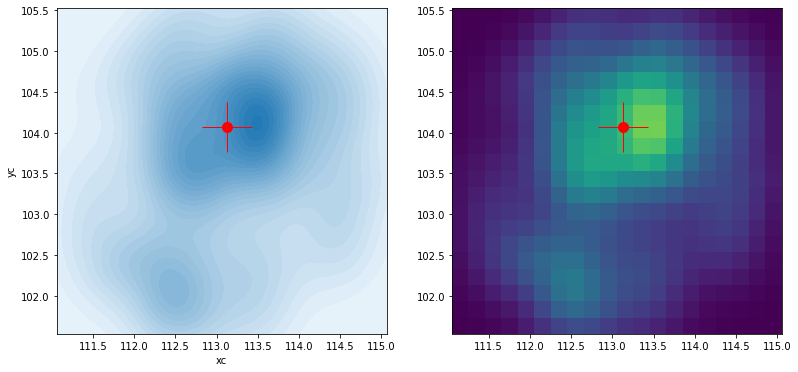

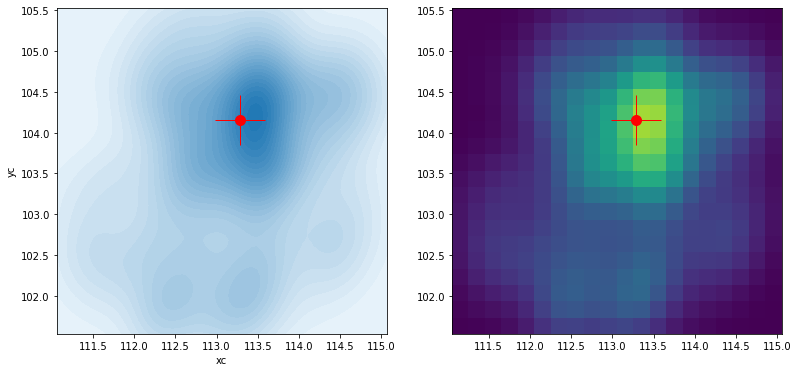

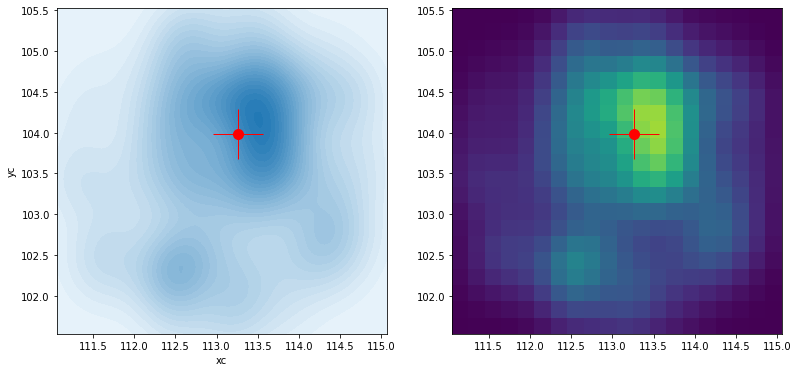

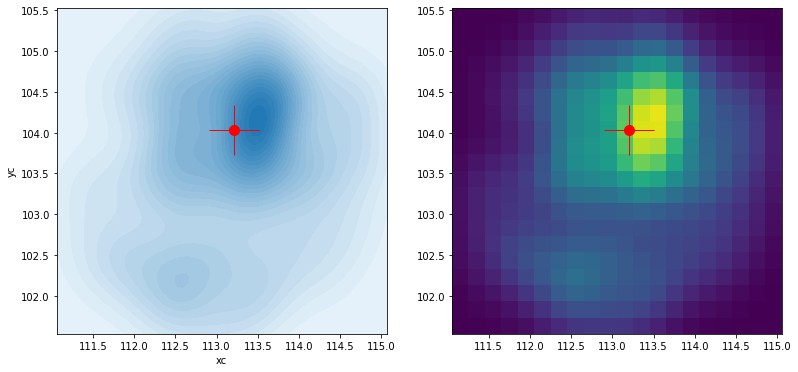

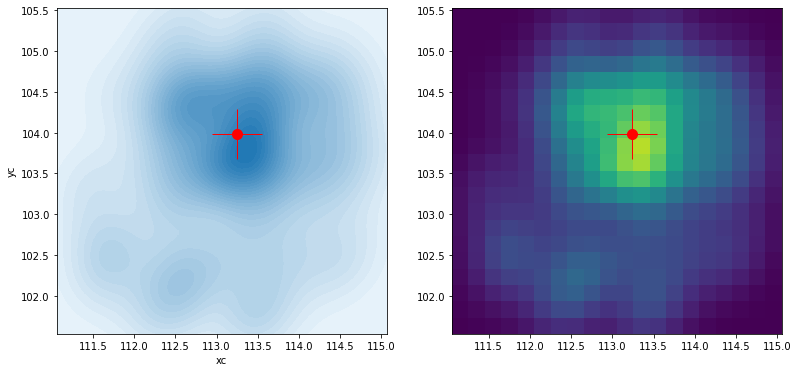

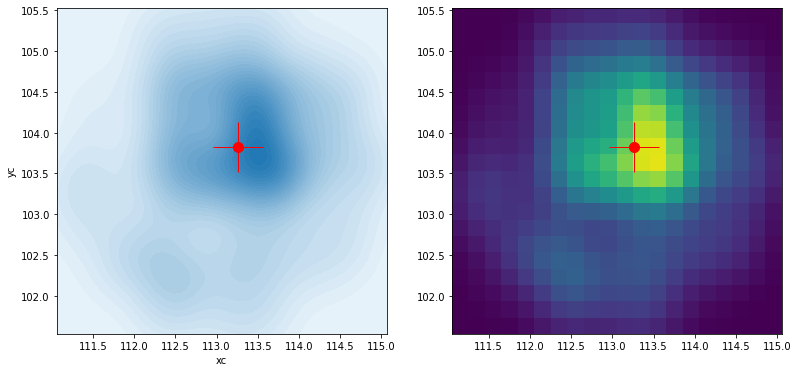

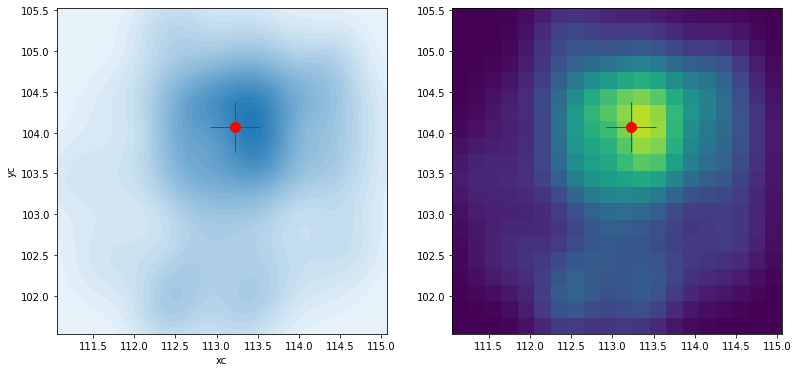

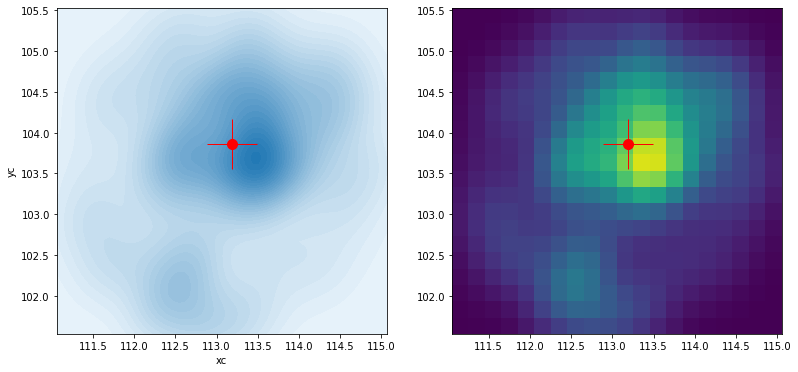

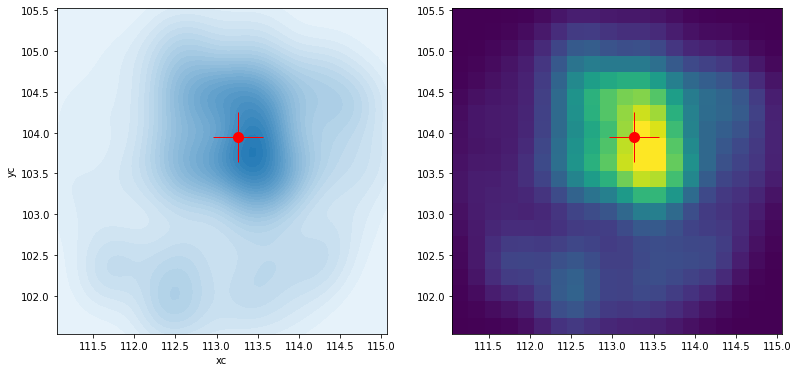

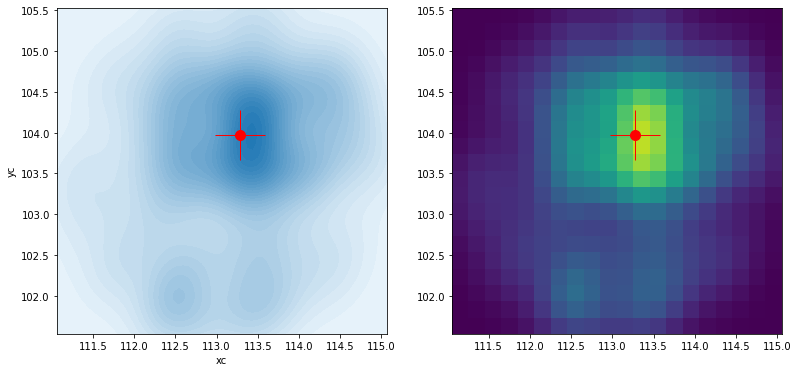

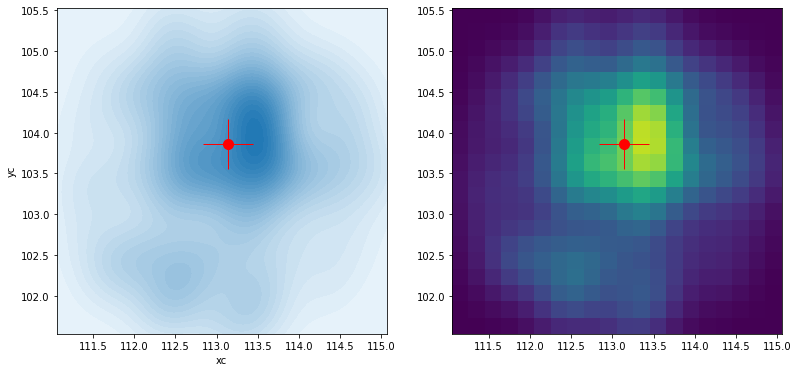

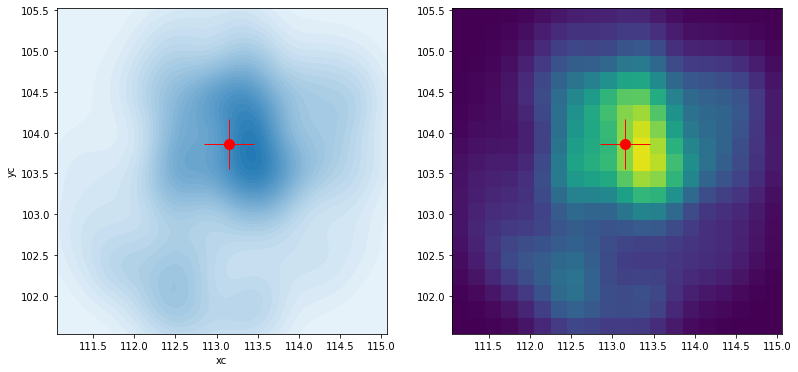

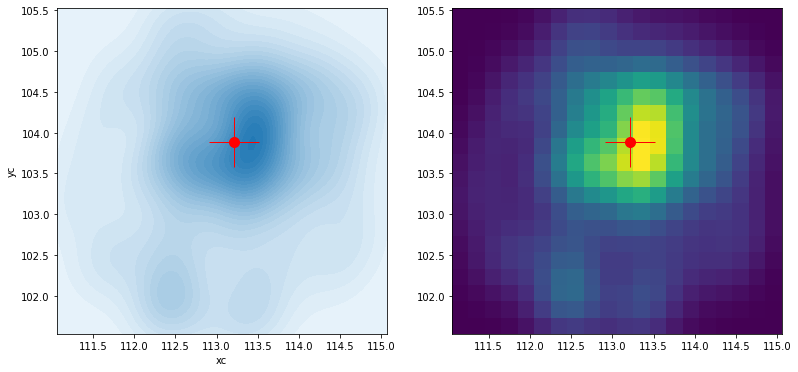

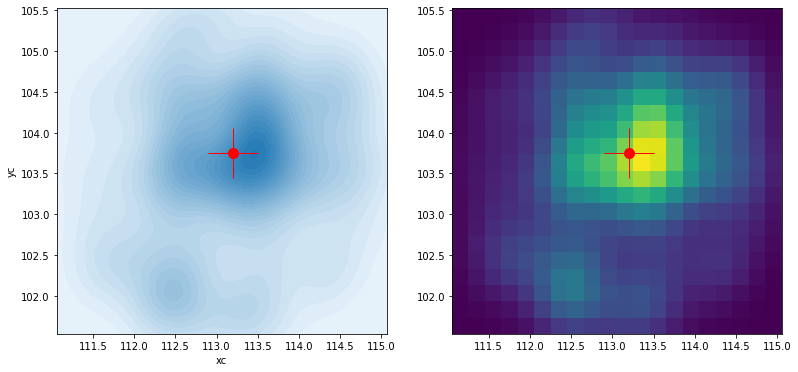

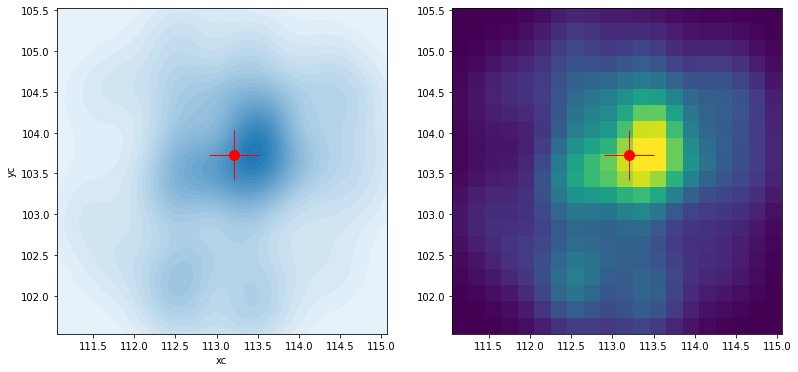

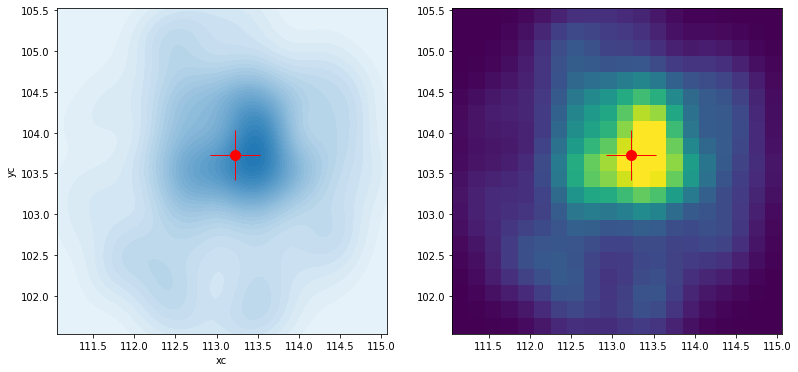

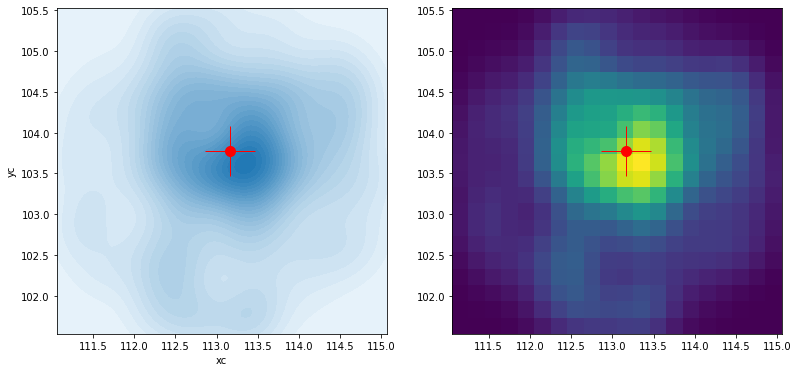

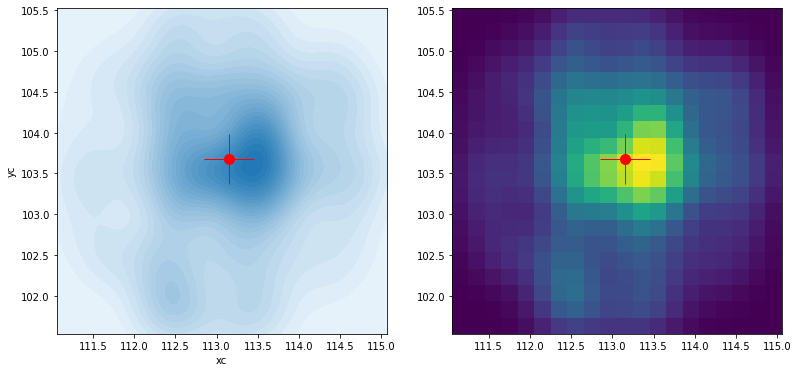

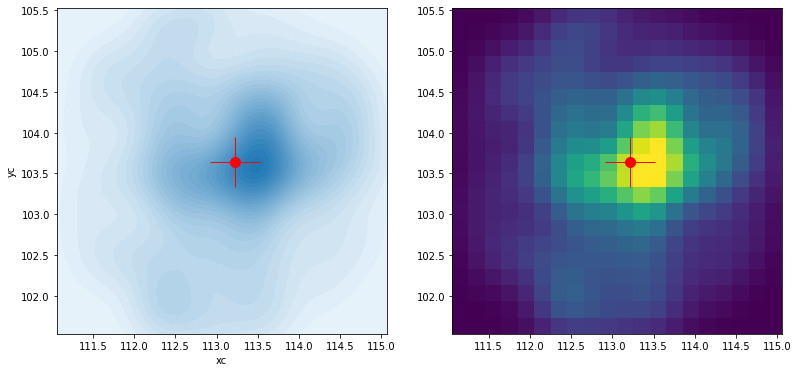

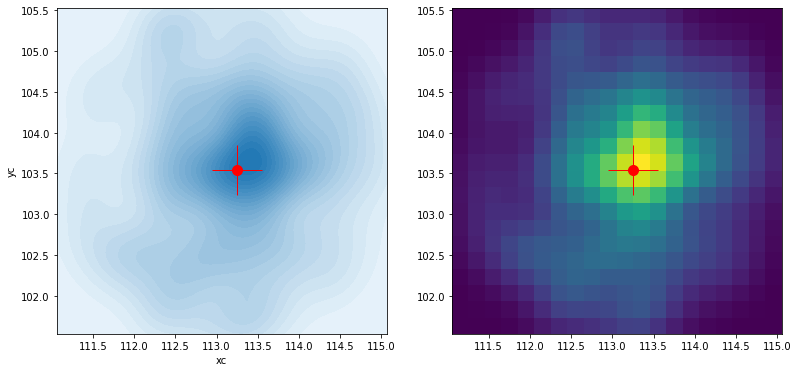

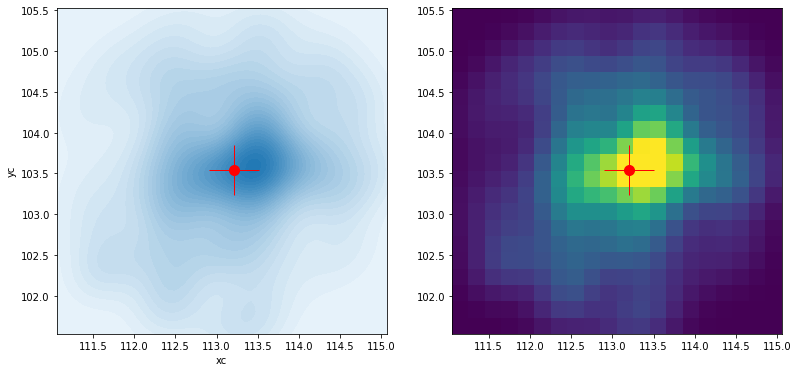

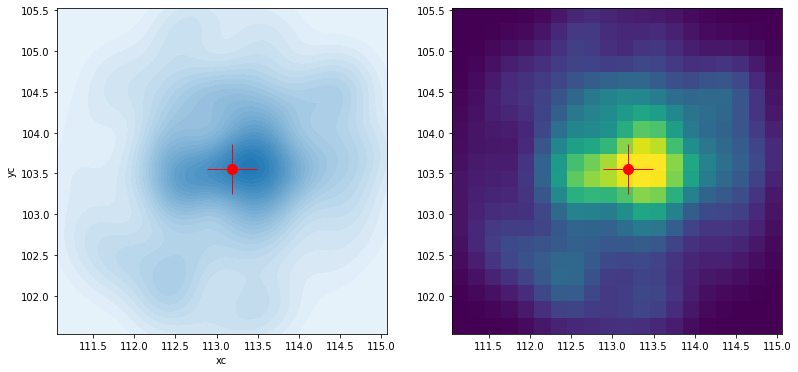

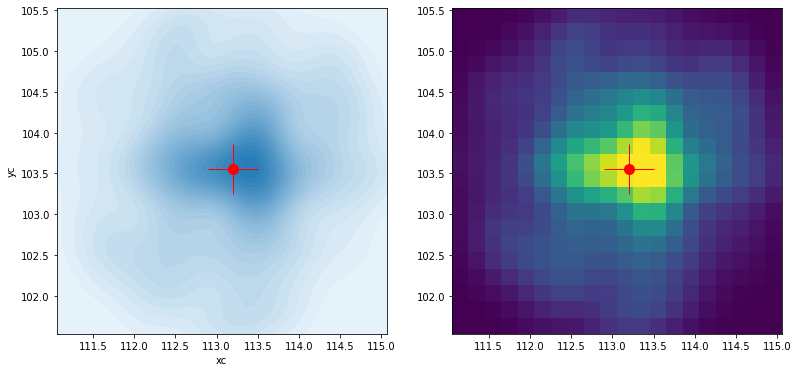

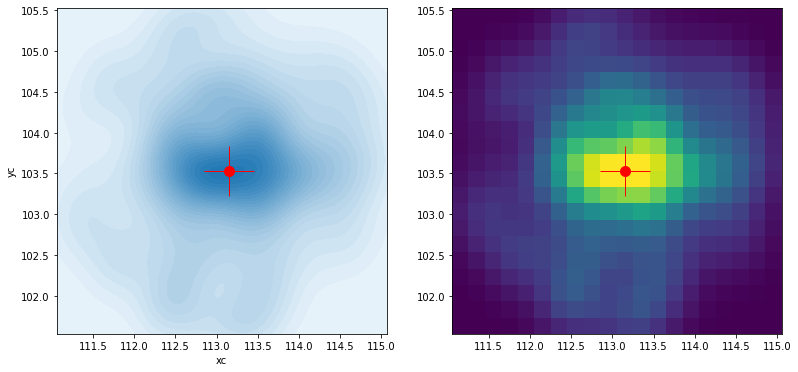

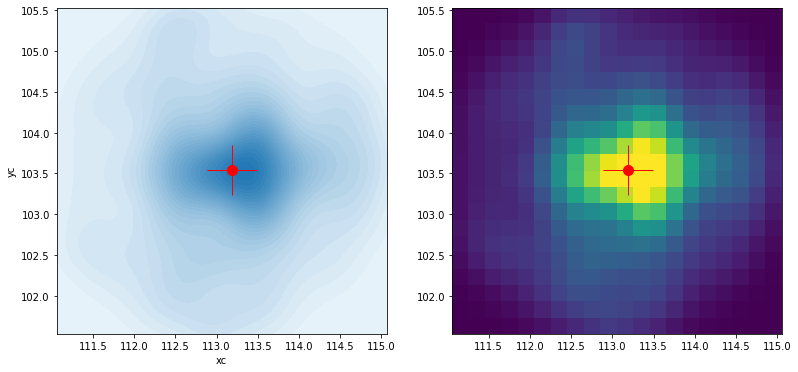

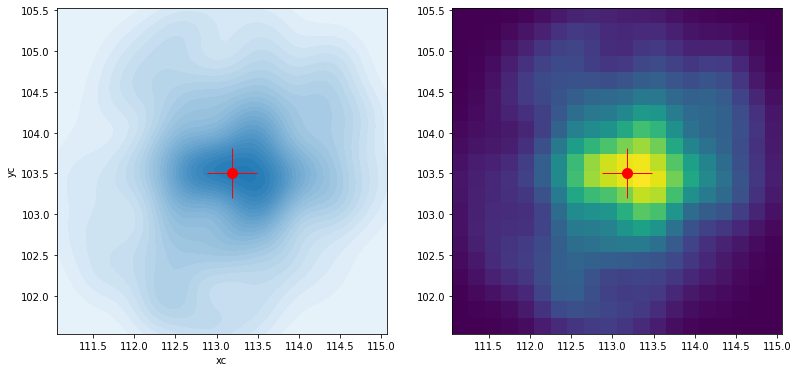

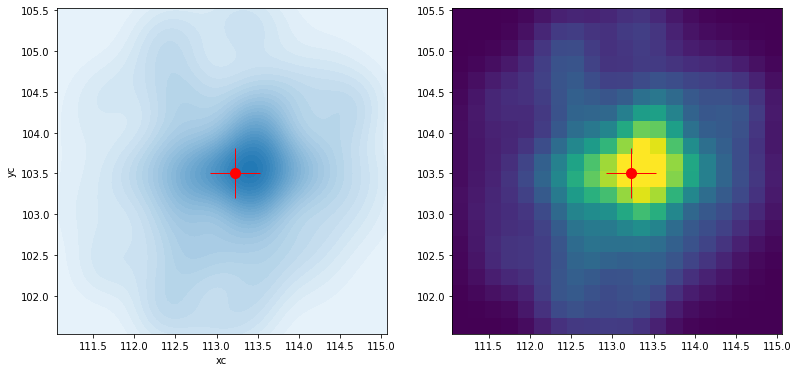

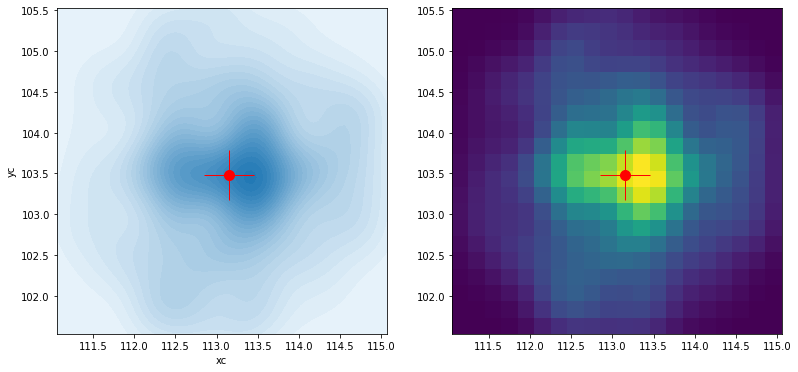

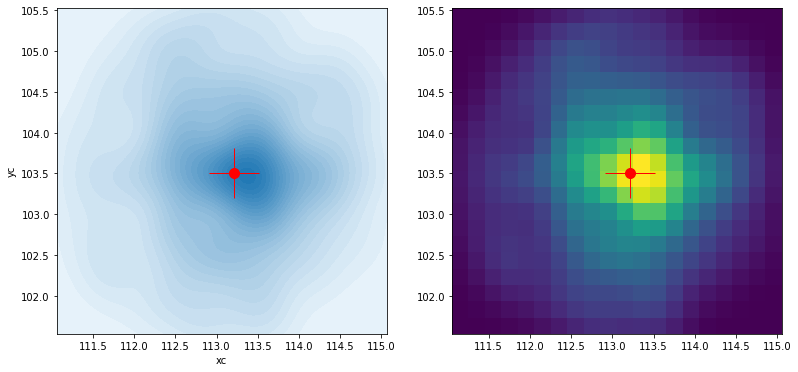

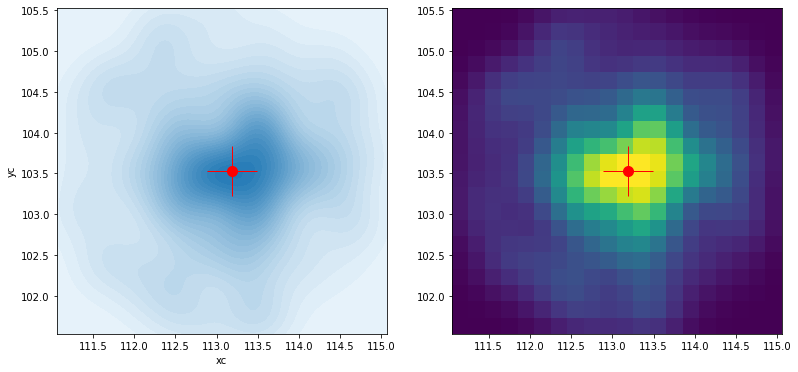

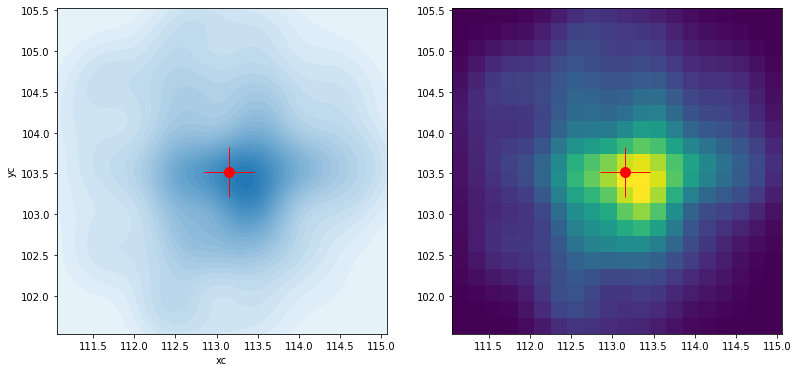

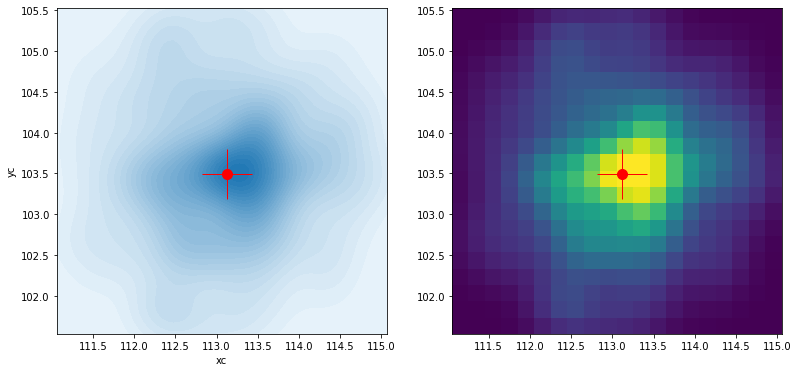

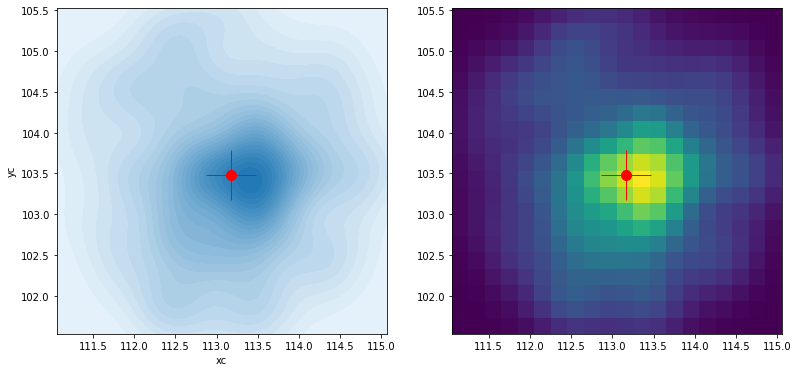

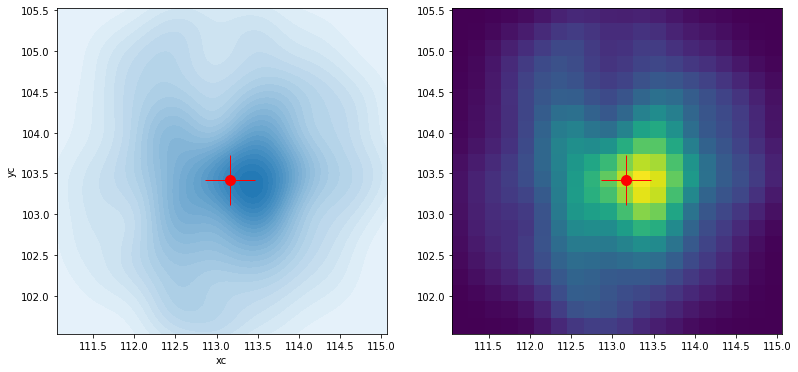

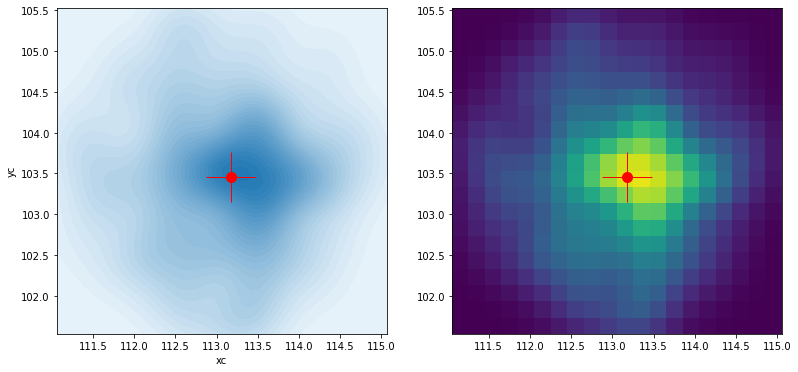

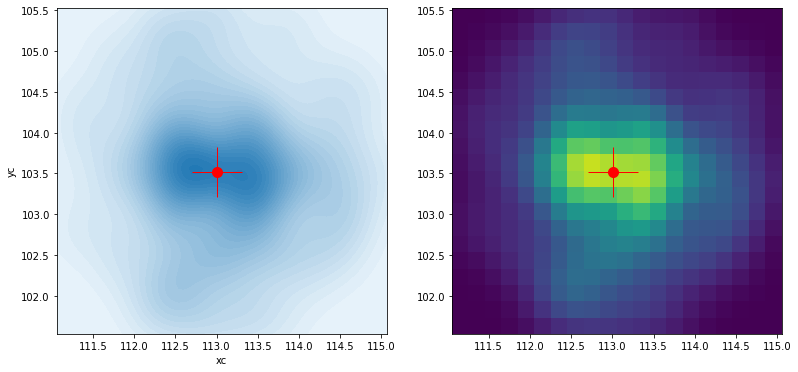

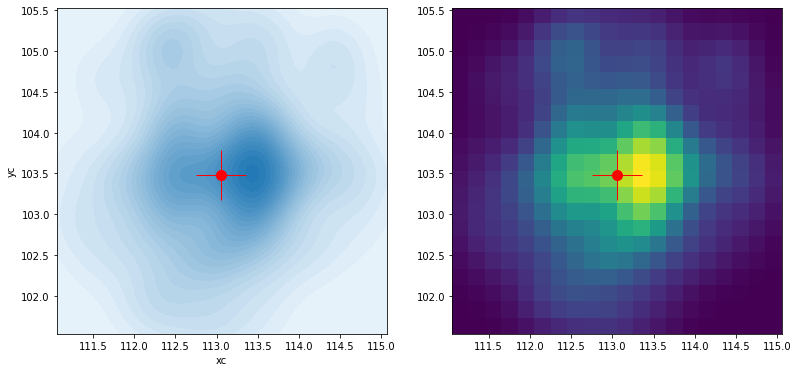

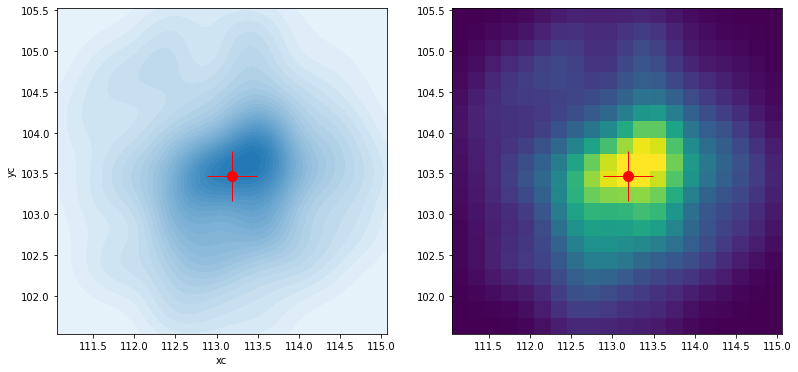

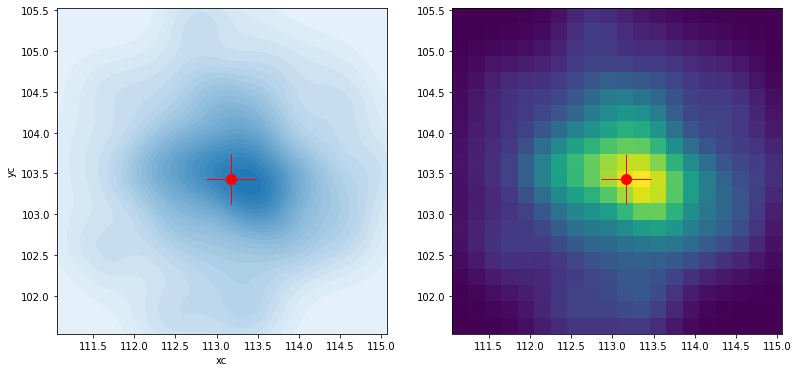

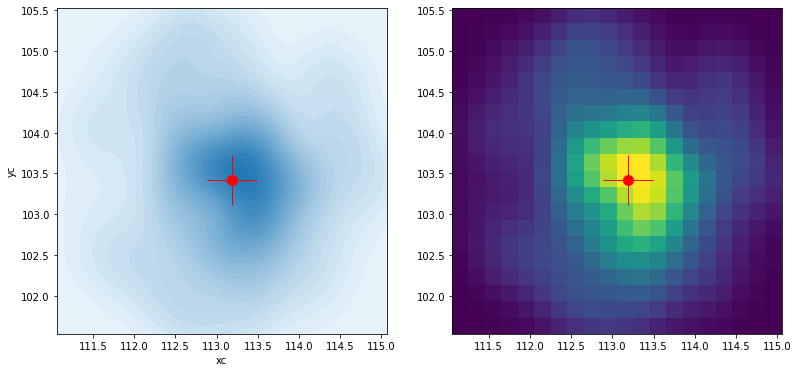

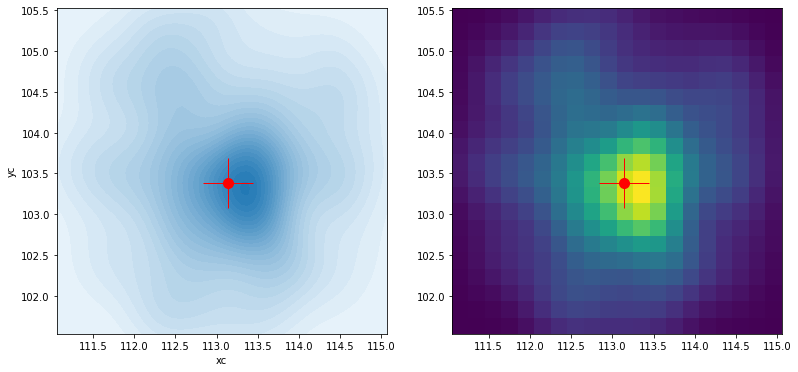

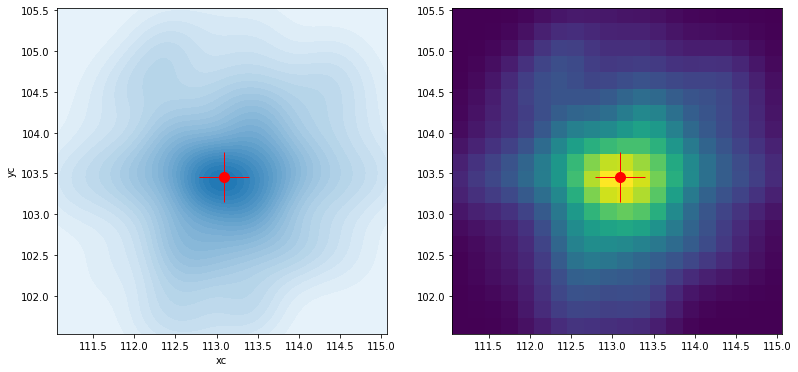

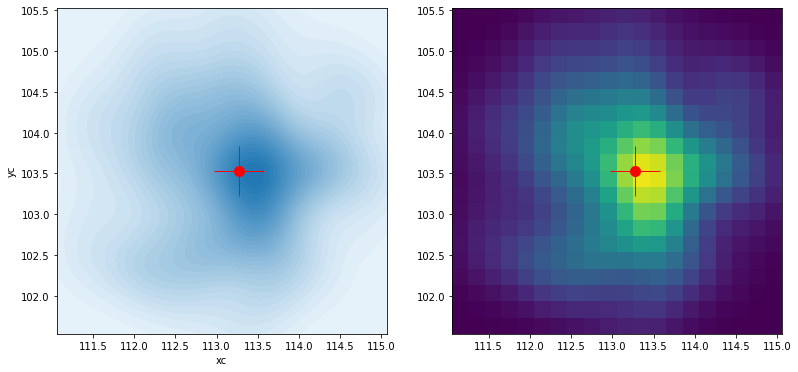

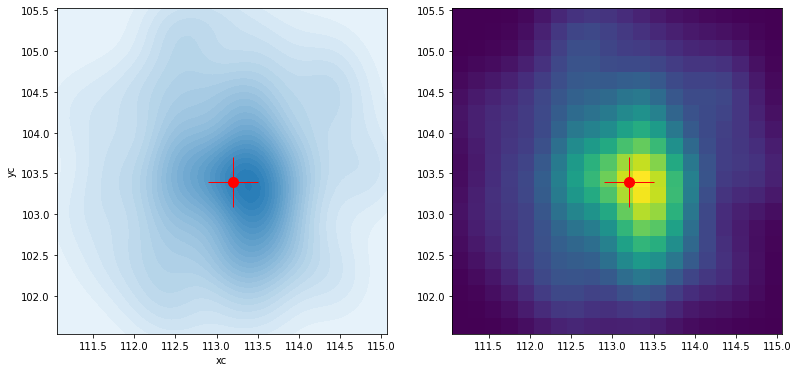

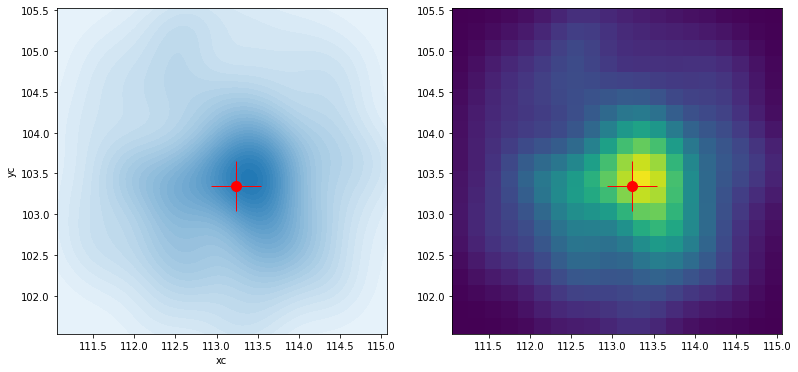

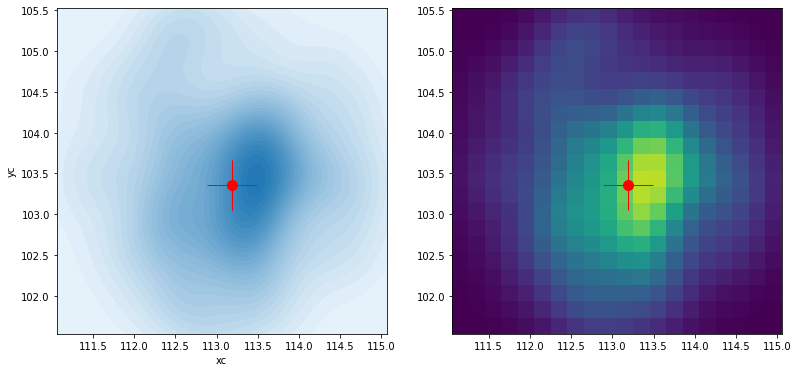

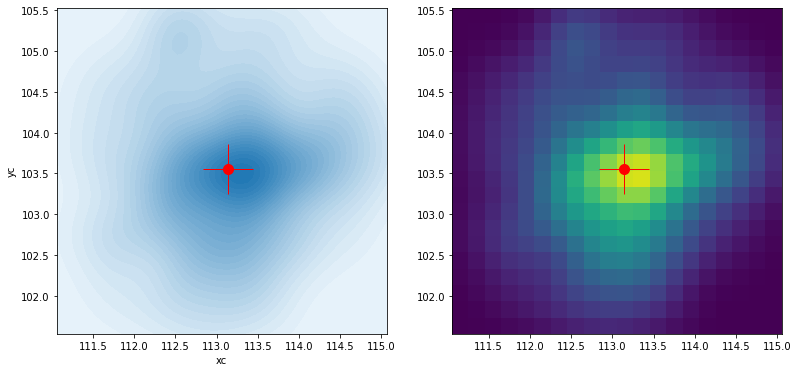

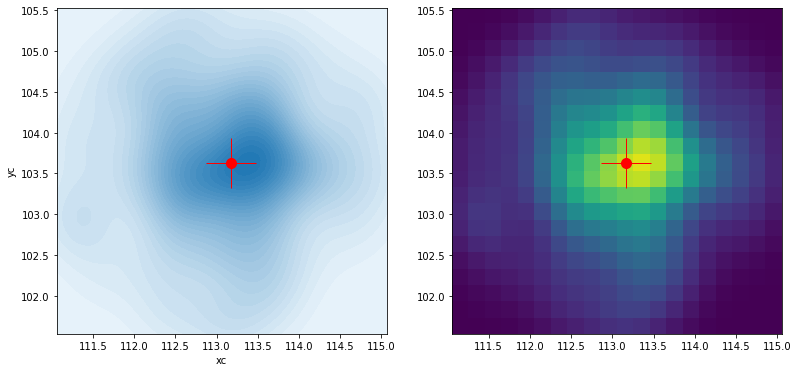

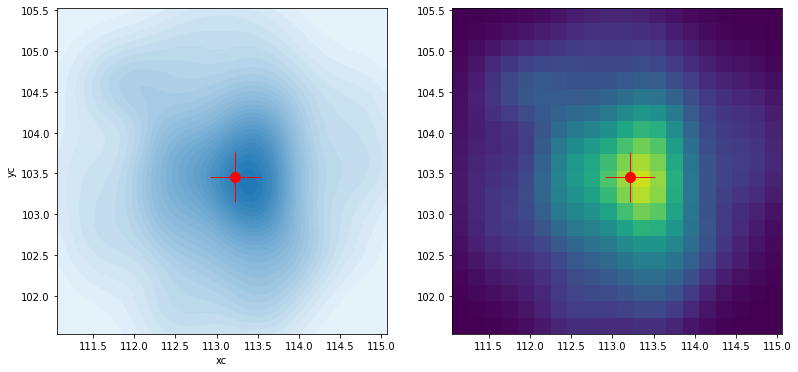

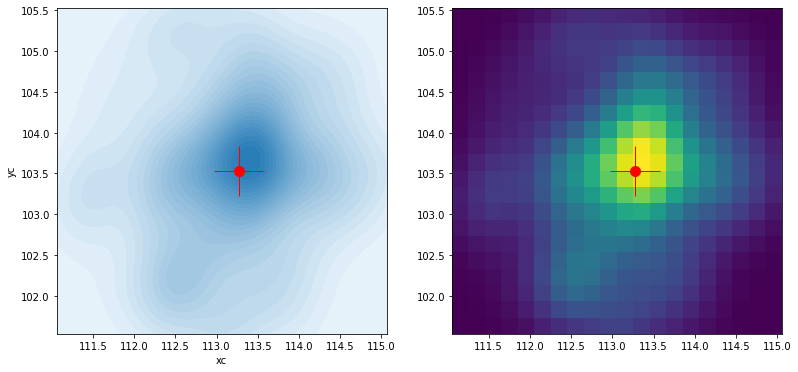

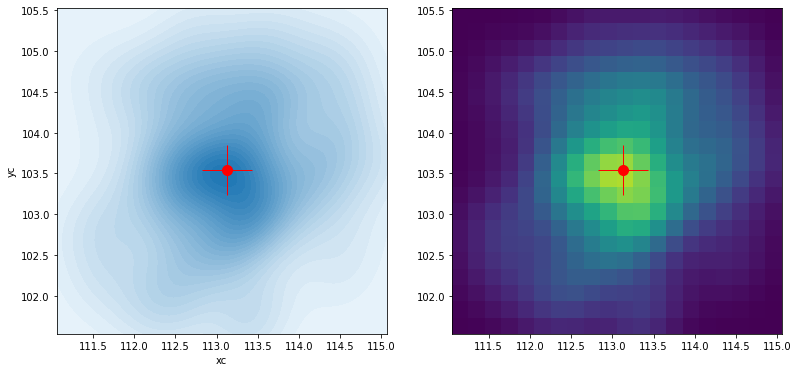

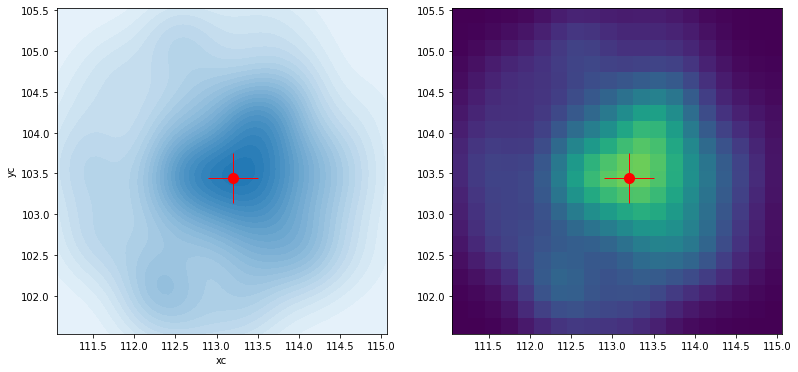

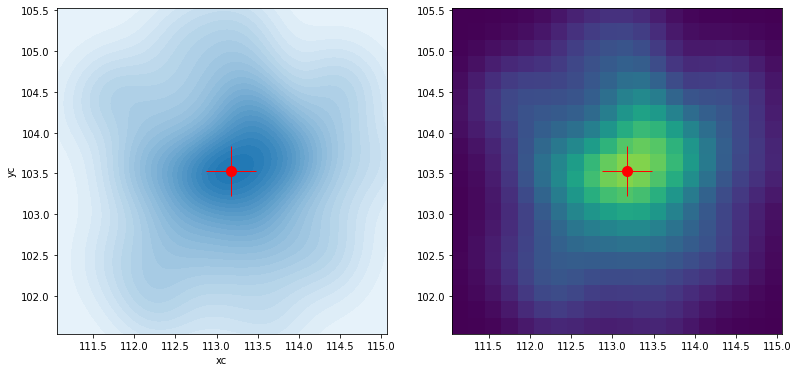

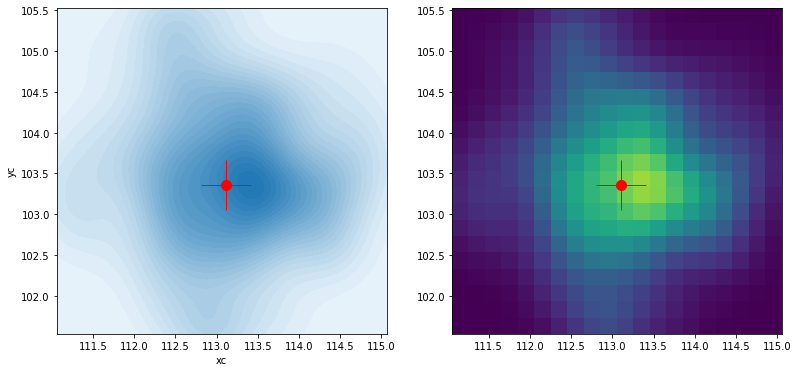

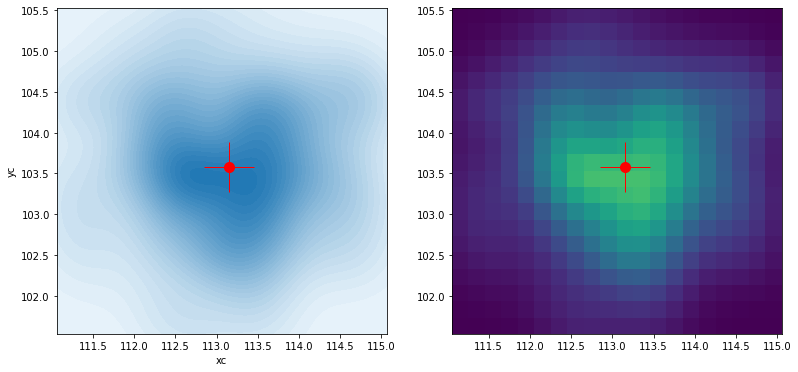

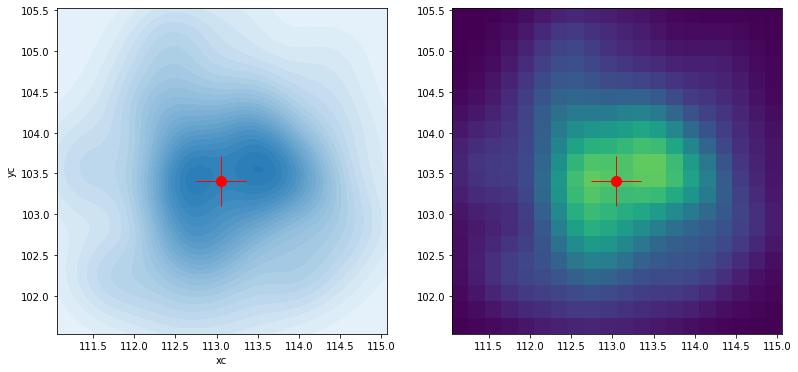

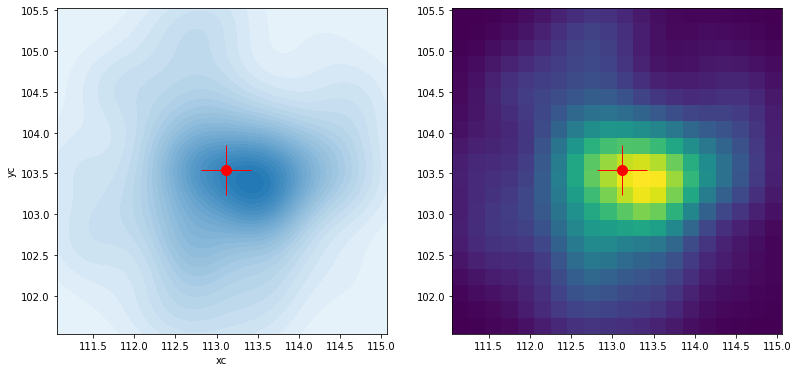

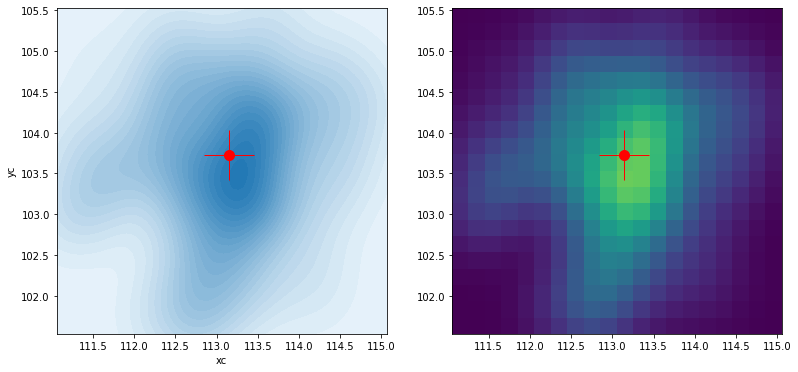

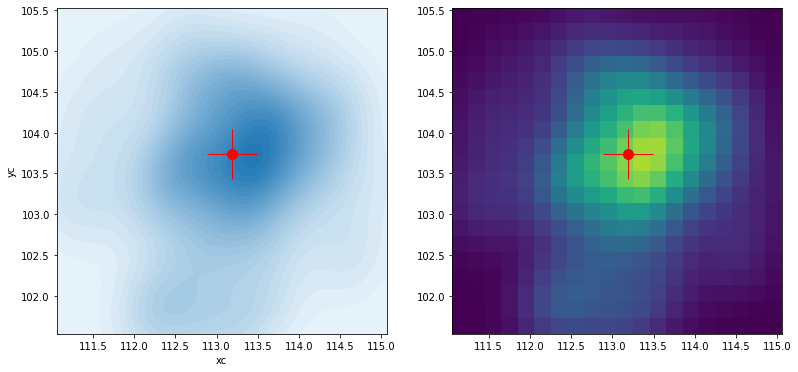

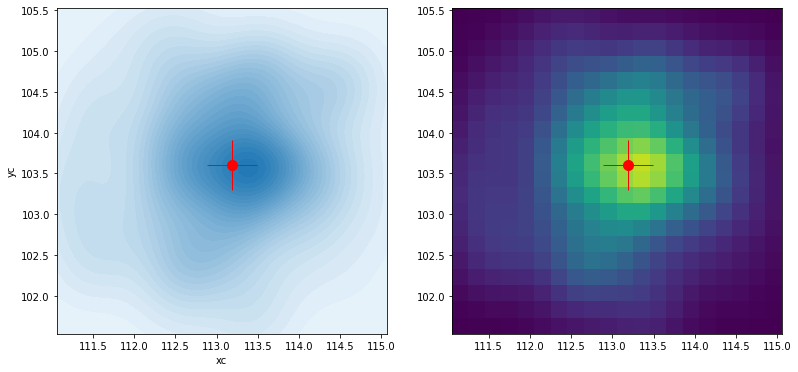

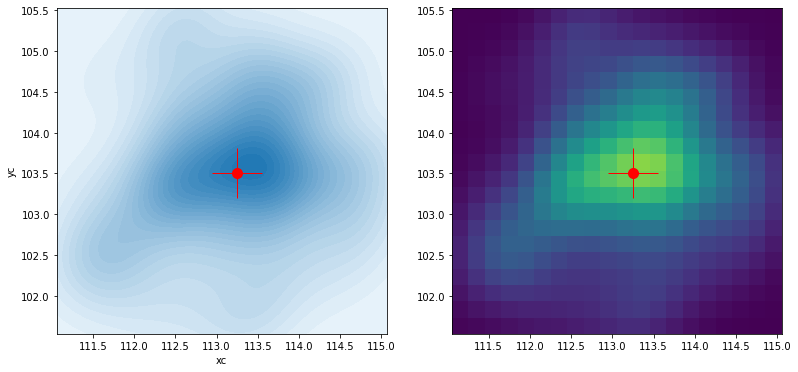

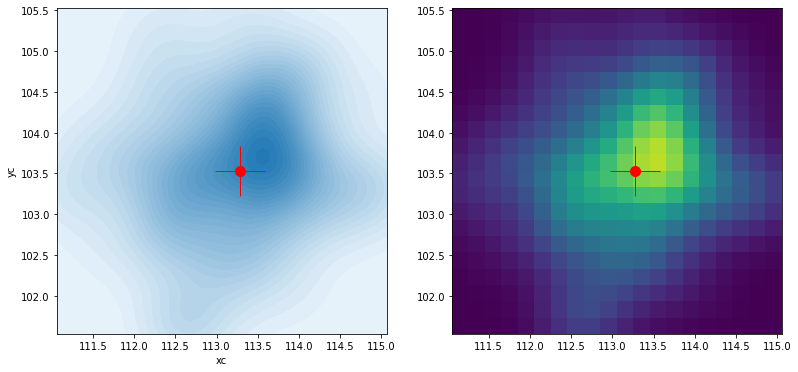

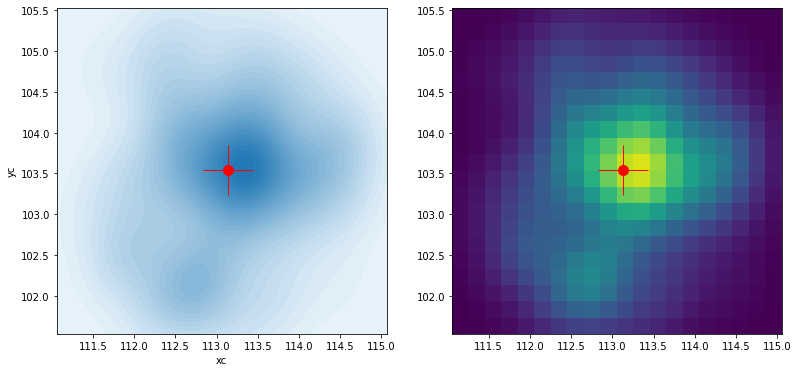

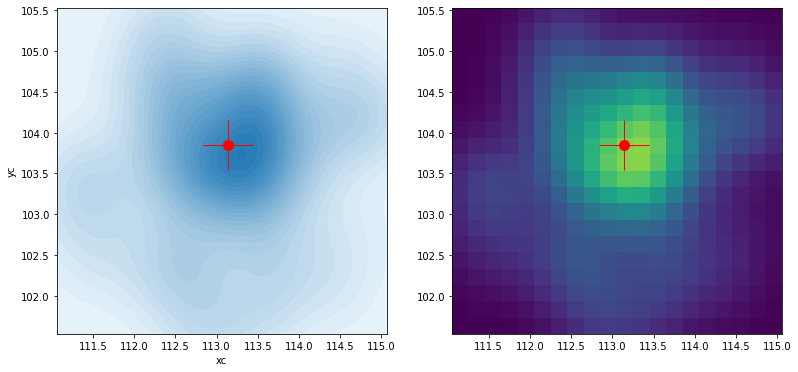

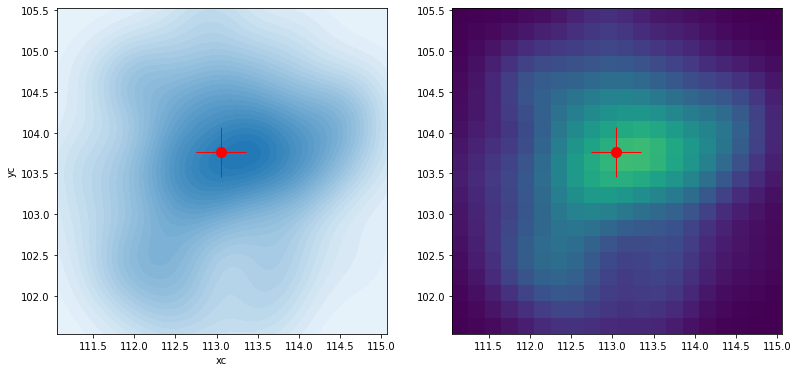

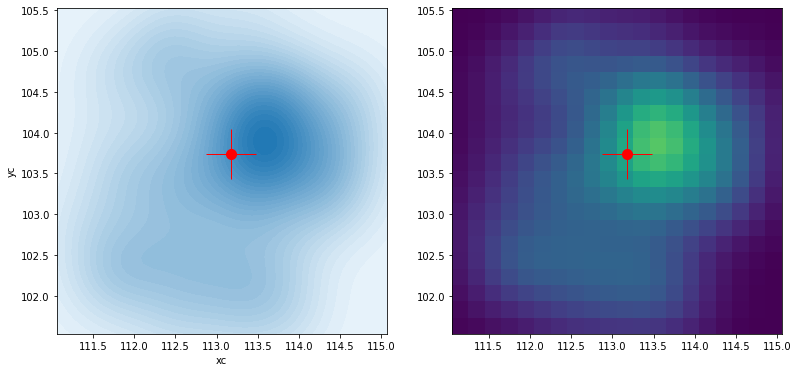

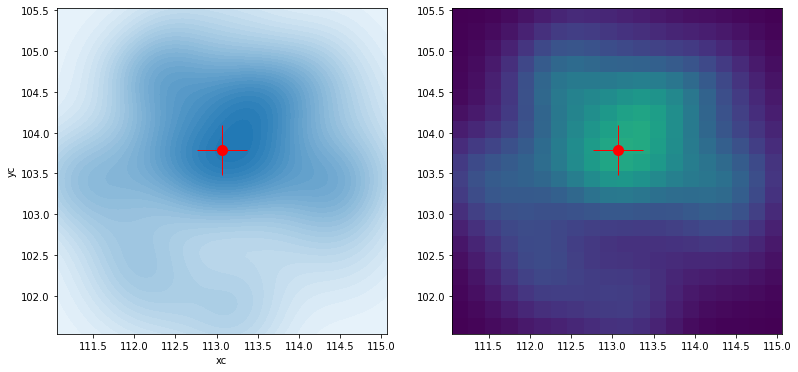

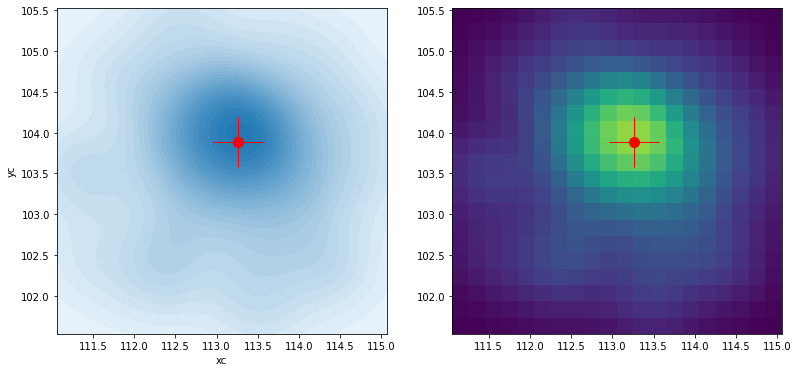

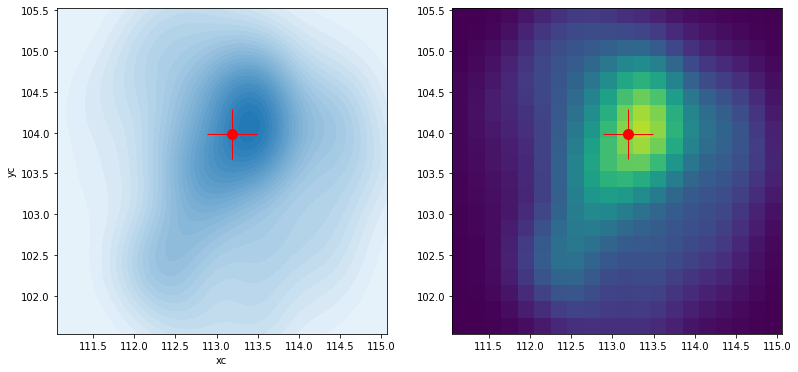

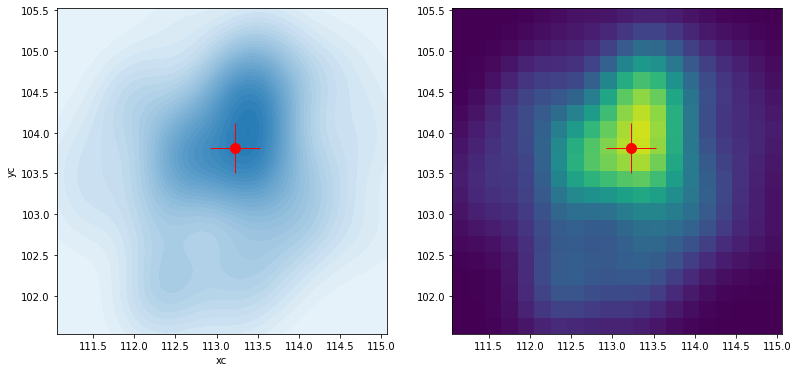

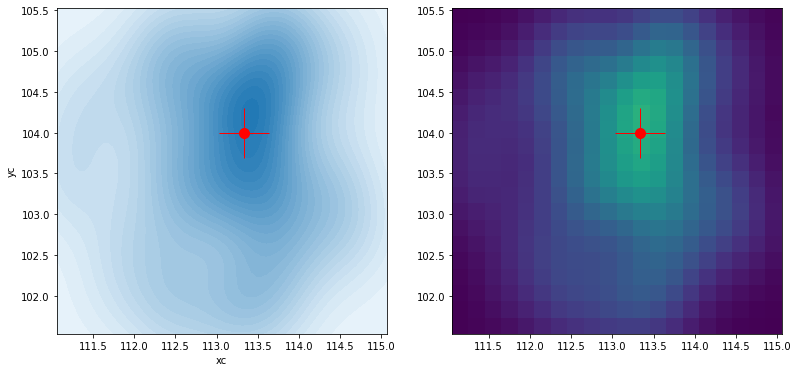

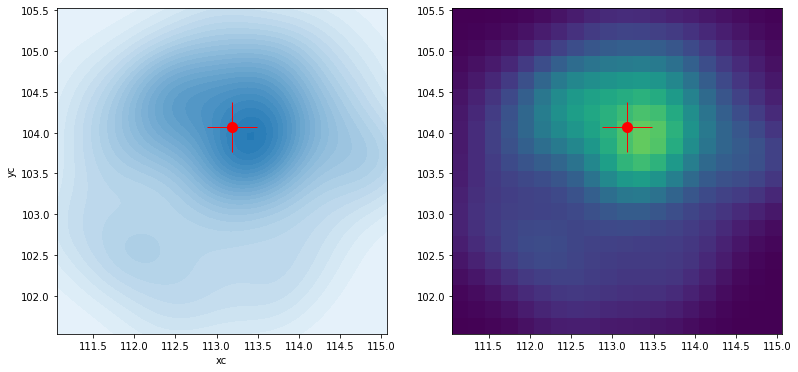

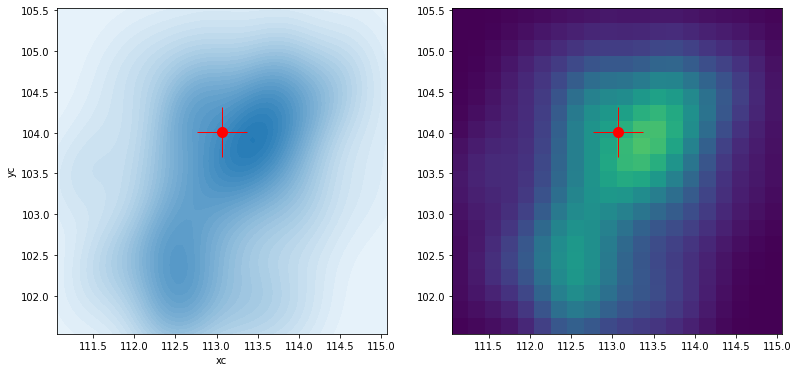

In [53]:
pbins = 20
tbins = 100      
n=0
used_data = Ion_6#.query(f"1.54e11 < time < 1.545e11")
t = used_data['tfold']
Tmin = t.min()
Tmax = t.max()
mean_x = x6; mean_y = y6+1
sigma_x = 1; sigma_y = 1
amp_x = 500; amp_y = 500
c_x = 0; c_y = 0

xgrid = np.linspace(x6-2, x6+2, pbins)
ygrid = np.linspace(y6-2, y6+2, pbins)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
            
print ('Tmin =', Tmin, ' Tmax = ', Tmax, 'length = ', Tmax-Tmin)

Tbin = (Tmax - Tmin)/tbins
for i in range(0,tbins):
    if (i/10).is_integer() is True:
        print(i)
    start = Tmin + i*Tbin; stop = start + Tbin
    used = (Ion_6
             .query(f"{start}< tfold <{stop}"))
    
    xguess  = np.array([mean_x,sigma_x,amp_x,c_x])
    yguess  = np.array([mean_y,sigma_y,amp_y,c_y])
        
    hist_x, bins_x = np.histogram(used['xc'], 20, (x6-2,x6+2)) #, density=True),
    bin_centres_x = (bins_x[:-1] + bins_x[1:])/2
            
    hist_y, bins_y = np.histogram(used['yc'], 20, (y6-2,y6+2)) #, density=True) 
    bin_centres_y = (bins_y[:-1] + bins_y[1:])/2
                            
    popt_x, pcov_x = scipy.optimize.curve_fit(Gaussian, bin_centres_x, hist_x, p0=xguess, maxfev = 50000)
    hist_fit_x = Gaussian(bin_centres_x, *popt_x)
            
    popt_y, pcov_y = scipy.optimize.curve_fit(Gaussian, bin_centres_y, hist_y, p0=yguess, maxfev = 50000)
    hist_fit_y = Gaussian(bin_centres_y, *popt_y)
    mean_x = popt_x[0]; mean_y = popt_y[0]
    sigma_x = popt_x[1]; sigma_y = popt_y[1]
    amp_x = popt_x[2]; amp_y = popt_y[2]
    c_x = popt_x[3]; c_y = popt_y[3]
    
    data = np.vstack([used['xc'], used['yc']])
    kde = gaussian_kde(data)
    Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,6))
    pcm = sns.kdeplot(used['xc'], used['yc'], shade=True, n_levels=30, ax=ax1)
    ax1.plot(mean_x, mean_y, 'ro', markersize=10)
    ax1.plot(mean_x, mean_y, 'r+', markersize=50)
    ax1.set_xlim(x6-2,x6+2)
    ax1.set_ylim(y6-2,y6+2)
    ax2.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[x6-2, x6+2, y6-2, y6+2],
           cmap='viridis', vmin=0, vmax=.25)
    ax2.plot(mean_x, mean_y, 'ro', markersize=10)
    ax2.plot(mean_x, mean_y, 'r+', markersize=50)
    fig.savefig(f'All 8 Micromotion PNGs/{n}.png')
    n=n+1

images = [] 
n=0
for i in range(0,tbins):
    h = Image.open(f'All 8 Micromotion PNGs/{n}.png')
    images.append(h)
    n=n+1
    
images[0].save('All 8 Micromotion.gif',
               save_all=True,
               append_images=images[1:],
               duration=100,
               loop=0)

In [54]:
images = [] 
n=0
for i in range(0,tbins):
    h = Image.open(f'All 8 Micromotion PNGs/{n}.png')
    images.append(h)
    n=n+1
    
images[0].save('All 8 Micromotion.gif',
               save_all=True,
               append_images=images[1:],
               duration=100,
               loop=0)